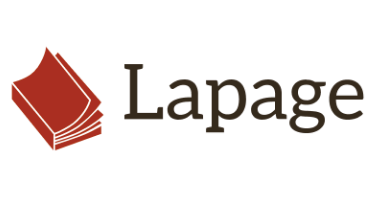

In [1]:
from IPython.display import Image, display

# Afficher l'image
display(Image(filename='C:/Users/Willkommen/OneDrive/Docs privés/HERVE/FORMATION/DATA_ANALYST_OC/PROJET_9/logo-lapage.png'))


Je viens d'intégrer l'équipe marketing de la librairie LAPAGE. L'activité de la librairie LAPAGE se concentrait jusqu'à il y a 2 ans autour de différents points de vente physiques.  
Suite à l'engouement des clients et au succès de certains de ses produits, elle a décidé d'ouvrir un site de vente en ligne.  
Après 2 ans d'activité du site de vente, son responsable commercial souhaite faire le point.  Il souhaite faire le point sur différents indicateurs de cette activité et chiffres  
clé de l'entreprise (indicateurs de vente, comportements clients, etc...)

# 1. Importation des librairies et chargement des fichiers

## 1.1. Importation des librairies

Je viens d'intégrer l'équipe marketing de la librairie LAPAGE. L'activité de la librairie LAPAGE se concentrait jusqu'à il y a 2 ans autour de différents points de vente physiques.  
Suite à à l'engouement des clients et au succès de certains de ses produits, elle a décidé d'ouvrir un site de vente en ligne.  
Après 2 ans d'activité du site de vente, son responsable commercial souhaite faire le point.  Il souhaite faire le point sur différents indicateurs de cette activité et chiffres  
clé de l'entreprise (indicateurs de vente, comportements clients, etc...)

In [2]:
# Importe les modules
import numpy as np
import datetime
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from scipy import stats

## 1.2. Définition d'un template pour les graphiques

In [3]:
# Définir le style global
def set_graph_style():
    # Définir les couleurs principales et secondaires
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

    # Utilisation de Seaborn pour un style visuel plus moderne
    sns.set_theme(
        style="whitegrid",  # Fond de grille blanche
        palette=colors,     # Palette de couleurs
        font="Arial",       # Police des textes
        font_scale=1.2      # Taille des polices globales
    )

    # Personnalisation des axes, titres, grilles, etc.
    plt.rcParams.update({
        'axes.titlesize': 16,        # Taille des titres
        'axes.titleweight': 'bold',  # Poids des titres
        'axes.labelsize': 14,        # Taille des étiquettes des axes
        'axes.labelweight': 'bold',  # Poids des étiquettes des axes
        'xtick.labelsize': 12,       # Taille des ticks sur l'axe X
        'ytick.labelsize': 12,       # Taille des ticks sur l'axe Y
        'legend.fontsize': 12,       # Taille des légendes
        'axes.grid': True,           # Grille activée
        'grid.alpha': 0.4,           # Transparence de la grille
        'grid.linestyle': '--',      # Style des lignes de la grille
        'figure.figsize': (10, 6),   # Taille par défaut des figures
        'legend.loc': 'best',        # Position des légendes
        'legend.frameon': False,     # Suppression de la bordure autour des légendes
    })

# Appliquer le style avant de tracer des graphiques
set_graph_style()

# Exemple d'utilisation
def plot_example(data, x, y, kind='bar', title="Exemple de graphique"):
    """
    Crée un graphique moderne basé sur les données et le type fourni.
    """
    if kind == 'bar':
        sns.barplot(data=data, x=x, y=y)
    elif kind == 'line':
        sns.lineplot(data=data, x=x, y=y)
    elif kind == 'pie':
        data.set_index(x)[y].plot.pie(autopct='%1.1f%%', colors=sns.color_palette())
    
    plt.title(title)
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.tight_layout()
    plt.show()


## 1.3. Chargement des fichiers

In [4]:
# Importation des fichiers csv
df_customers = pd.read_csv('C:/Users/Willkommen/OneDrive/Docs privés/HERVE/FORMATION/DATA_ANALYST_OC/PROJET_9/DAN-P6-donnees/DAN-P6-donnees/customers.csv', encoding='utf-8')
df_products = pd.read_csv('C:/Users/Willkommen/OneDrive/Docs privés/HERVE/FORMATION/DATA_ANALYST_OC/PROJET_9/DAN-P6-donnees/DAN-P6-donnees/products.csv', encoding='utf-8')
df_transactions = pd.read_csv('C:/Users/Willkommen/OneDrive/Docs privés/HERVE/FORMATION/DATA_ANALYST_OC/PROJET_9/DAN-P6-donnees/DAN-P6-donnees/transactions.csv', encoding='utf-8')

# 2. Analyse exploratoire des fichiers

## 2.1. Analyse exploratoire du fichier customers.csv

In [5]:
#J'affiche les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customers.shape[1]))

Le tableau comporte 8623 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [6]:
#Je consulte le nombre de colonnes
#la nature des données dans chacune des colonnes et
#le nombre de valeurs présentes dans chacune des colonnes
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
#J'affiche les 5 premières lignes de la table
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [8]:
#Je renomme la colonne 'sex' et modifie son type en category
df_customers.rename(columns={'sex': 'gender'}, inplace=True)
df_customers['gender'] = df_customers['gender'].astype('category')

In [9]:
#Je renomme la colonne 'birth'
df_customers.rename(columns={'birth': 'birth_year'}, inplace=True)

In [10]:
#Je vérifie s'il y a des lignes en doublons dans la colonne 'client_id'
df_customers.duplicated(subset=['client_id']).sum()

np.int64(0)

Je constate qu'il n'y a pas de doublons dans la colonne 'client_id'

In [11]:
#J'affiche les valeurs distinctes de la colonne 'gender'
df_customers['gender'].unique()

['f', 'm']
Categories (2, object): ['f', 'm']

### 2.1.1. Analyse exploratoire de chaque variable customers.csv

#### 2.1.1.1. Analyse de la variable 'birth_year'

In [12]:
#J'affiche les valeurs distinctes triées de la colonne 'birth_year'
df_customers['birth_year'].sort_values().unique()

array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])

Les valeurs sont toutes de 4 chiffres et vont de 1929 à 2004. Il n'y a pas d'anomalies.

## 2.2. Analyse exploratoire du fichier products.csv

In [13]:
#J'affiche les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_products.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_products.shape[1]))

Le tableau comporte 3287 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [14]:
#Je consulte le nombre de colonnes
#la nature des données dans chacune des colonnes et
#le nombre de valeurs présentes dans chacune des colonnes
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [15]:
#J'affiche les 5 premières lignes de la table
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [16]:
#Je renomme la colonne 'categ' et modifie son type en category
df_products.rename(columns={'categ': 'category'}, inplace=True)
df_products['category'] = df_products['category'].astype('category')

In [17]:
#Je renomme la colonne 'id_prod'
df_products.rename(columns={'id_prod': 'product_id'}, inplace=True)

In [18]:
#Je vérifie s'il y a des lignes en doublons dans la colonne 'product_id'
df_products.duplicated(subset=['product_id']).sum()

np.int64(0)

Je constate qu'il n'y a pas de doublons dans la colonne 'product_id'

In [19]:
#J'affiche les valeurs distinctes de la colonne 'category'
df_products['category'].unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

### 2.2.1. Analyse exploratoire de chaque variable products.csv

#### 2.2.1.1. Analyse de la variable 'price'

In [20]:
#Je vérifie les prix: Y a t-il des prix non renseignés, négatifs ou nuls?
#J'affiche le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_products['price'].isnull()))

Nombres d'article avec un prix non renseignés: 0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Name: price, Length: 3287, dtype: bool


Tous les prix sont renseignés.

In [21]:
#J'affiche le prix minimum de la colonne "price"
min_price = df_products['price'].min()
print("Le prix minimum est: {}".format(min_price))
#J'affiche le prix maximum de la colonne "price"
max_price = df_products['price'].max()
print("Le prix maximum est: {}".format(max_price))

del min_price, max_price

Le prix minimum est: -1.0
Le prix maximum est: 300.0


In [22]:
#J'affiche les prix inférieurs à 0 
price_error = df_products[df_products['price'] < 0]
print(price_error)

    product_id  price category
731        T_0   -1.0        0


Je constate qu'il y a un seul produit avec un prix négatif. En consultant son 'product_id', je peux remarquer qu'il s'agit d'un produit test.
Je peux donc le supprimer.

In [23]:
#Je supprime la ligne
df_products.drop(df_products[df_products['product_id'] == "T_0"].index, inplace=True)


In [24]:
#Je vérifie ma suppression de ligne 
# print(df_products[df_products['price'] < 0])

## 2.3. Analyse exploratoire du fichier transactions.csv

In [25]:
#J'affiche les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transactions.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transactions.shape[1]))

Le tableau comporte 679532 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [26]:
#Je consulte le nombre de colonnes
#la nature des données dans chacune des colonnes et
#le nombre de valeurs présentes dans chacune des colonnes
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [27]:
#J'affiche les 5 premières lignes de la table
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [28]:
#Je renomme la colonne 'id_prod'
df_transactions.rename(columns={'id_prod': 'product_id'}, inplace=True)

In [29]:
#Je modifie le format de la colonne 'date'
df_transactions['date']=pd.to_datetime(df_transactions['date'])

ValueError: time data "test_2021-03-01 02:30:02.237419" doesn't match format "%Y-%m-%d %H:%M:%S.%f", at position 3019. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

La conversion du format de la colonne 'date' a échoué. ValueError retourne une erreur à la position 3019 avec le texte 'test_' avant la date.

In [30]:
#Je sélectionne et retourne les lignes où la colonne 'date' commence par le texte 'test_'
df_transactions.loc[df_transactions['date'].str.startswith('test_')]

,product_id,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Je constate que 200 lignes de df_transactions correspondent à des tests. Il y aura lieu de les supprimer.  
Je remarque également que pour ces lignes le 'product_id' commence par T_ et le client_id par ct_.  
Il faudra donc également contrôler dans les 2 autres DataFrames qu'il n'y ait pas des produits ou des clients 'test'.

In [31]:
#Je stocke ces lignes pour répertorier les anomalies
df_transactions_error = df_transactions.loc[df_transactions['date'].str.startswith('test_')]
print(df_transactions_error)

       product_id                             date session_id client_id
3019          T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138          T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668          T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728         T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292         T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...           ...                              ...        ...       ...
657830        T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081        T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680        T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647        T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180        T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]


In [32]:
#Je supprime les lignes de df_transactions où la colonne 'date' commence par 'test_'
df_transactions = df_transactions[~df_transactions['date'].str.startswith('test_')].reset_index(drop=True)

In [33]:
#Je modifie le format de la colonne 'date'
df_transactions['date']=pd.to_datetime(df_transactions['date'])

In [34]:
#Je vérifie que le df_transactions ne contient pas de doublons
df_transactions.duplicated(subset=['session_id', 'client_id', 'product_id', 'date']).sum()

np.int64(0)

Je vais vérifier que le DataFrame df_customers ne contienne pas des clients 'test'

In [35]:
#Je sélectionne et retourne les lignes où la colonne client_id commence par 'ct'
df_customers.loc[df_customers['client_id'].str.startswith('ct')]

,client_id,gender,birth_year
2735,ct_0,f,2001
8494,ct_1,m,2001


Je trouve effectivement 2 clients 'test'. Je vais donc les supprimer, mais en 1er lieu je les stocke pour répertorier les anomalies.

In [36]:
#Je stocke ces lignes pour répertorier les anomalies
df_customers_error = df_customers.loc[df_customers['client_id'].str.startswith('ct')]

In [37]:
#Je supprime les lignes de df_customers où la colonne 'client_id' commence par 'ct_'
df_customers = df_customers[~df_customers['client_id'].str.startswith('ct_')].reset_index(drop=True)


Je vais vérifier que le DataFrame df_products ne contienne pas des produits 'test'

In [38]:
#Je sélectionne et retourne les lignes où la colonne product_id commence par 'T_'
df_products.loc[df_products['product_id'].str.startswith('T_')]

,product_id,price,category


Il n'y a plus de produits 'test'

### 2.3.1. Analyse exploratoire de chaque variable transactions.csv

#### 2.3.1.1. Analyse de la variable 'date'

In [39]:
#J'affiche les dates minimum et maximum de transactions.csv
date_min=df_transactions['date'].min()
date_max=df_transactions['date'].max()

print(f"Date minimum : {date_min}")
print(f"Date maximum : {date_max}")

del [date_min, date_max]

Date minimum : 2021-03-01 00:01:07.843138
Date maximum : 2023-02-28 23:58:30.792755


Le site de ventes en ligne a ouvert il y a 2 ans. Les 1ères transactions ont été enregistrées à compter du 01/03/2021.  
Notre DataFrame contient des données sur 24 mois, soit du 01/03/2021 jusqu'au 28/02/2023, donc 3 années différentes.

Nos 3 DataFrames ont été nettoyés, nous pouvons donc procéder à leur jointure.

# 3. Jointure des fichiers

## 3.1. Jonction du fichier df_transactions et df_customers

Je décide de faire une jointure outer sur la colonne client_id des 2 DataFrames afin de conserver tous les enregistrements de 2 DataFrames

In [40]:
#Fusion des fichiers df_transactions et df_customers
df_merge = pd.merge(df_transactions, df_customers, how='outer', left_on='client_id', right_on='client_id', indicator=True)

In [41]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
#J'affiche les lignes sans correspondance dans l'un des deux fichiers
#'left_only' = présent dans df_transactions mais pas dans df_customers
#'right_only' = présent dans df_customers mais pas dans df_transactions
non_matching_rows = df_merge[df_merge['_merge'] != 'both']


# Afficher les lignes qui ne matchent pas
print(non_matching_rows)

       product_id date session_id client_id gender  birth_year      _merge
18130         NaN  NaT        NaN    c_1223      m        1963  right_only
165377        NaN  NaT        NaN    c_2706      f        1967  right_only
189365        NaN  NaT        NaN    c_3017      f        1992  right_only
223199        NaN  NaT        NaN    c_3443      m        1959  right_only
237394        NaN  NaT        NaN    c_3526      m        1956  right_only
257888        NaN  NaT        NaN    c_3789      f        1997  right_only
278852        NaN  NaT        NaN    c_4086      f        1992  right_only
302230        NaN  NaT        NaN    c_4358      m        1999  right_only
305396        NaN  NaT        NaN    c_4406      f        1998  right_only
308972        NaN  NaT        NaN    c_4447      m        1956  right_only
375882        NaN  NaT        NaN    c_5223      m        2003  right_only
377051        NaN  NaT        NaN    c_5245      f        2004  right_only
429697        NaN  NaT   

Cette liste correspond aux clients qui n'ont pas achetés sur notre site en ligne. Ces données sont stockées dans non_matching_rows pour les répertorier éventuellement.  
Nous pouvons supprimer ces lignes de notre df_merge.

In [42]:
#Je supprime les lignes ne matchant pas
print(f"Taille initiale : {df_merge.shape[0]}")
df_merge = df_merge[df_merge['_merge'] == 'both']
print(f"Taille après suppression : {df_merge.shape[0]}")


Taille initiale : 679353
Taille après suppression : 679332


In [43]:
#Je supprime la colonne '_merge'
df_merge = df_merge.drop(columns=['_merge'])

## 3.2. Jonction du fichier df__merge et df_products

Je décide de faire une jointure outer sur la colonne product_id des 2 DataFrames afin de conserver tous les enregistrements de 2 DataFrames

In [44]:
#Fusion des fichiers df_merge et df_products
df_merge = pd.merge(df_merge, df_products, how='outer', left_on='product_id', right_on='product_id', indicator=True)

In [45]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
#J'affiche les lignes sans correspondance dans l'un des deux fichiers
#'left_only' = présent dans df_merge mais pas dans df_products
#'right_only' = présent dans df_products mais pas dans df_merge
non_matching_rows_products = df_merge[df_merge['_merge'] != 'both']


# Afficher les lignes qui ne matchent pas
print(non_matching_rows_products)

       product_id date session_id client_id gender  birth_year   price  \
6073       0_1014  NaT        NaN       NaN    NaN         NaN    1.15   
6511       0_1016  NaT        NaN       NaN    NaN         NaN   35.06   
8723       0_1025  NaT        NaN       NaN    NaN         NaN   24.99   
21687      0_1062  NaT        NaN       NaN    NaN         NaN   20.08   
40971      0_1119  NaT        NaN       NaN    NaN         NaN    2.99   
...           ...  ...        ...       ...    ...         ...     ...   
415696        1_0  NaT        NaN       NaN    NaN         NaN   31.82   
511418      1_394  NaT        NaN       NaN    NaN         NaN   39.73   
677796       2_72  NaT        NaN       NaN    NaN         NaN  141.32   
678299       2_86  NaT        NaN       NaN    NaN         NaN  132.36   
678300       2_87  NaT        NaN       NaN    NaN         NaN  220.99   

       category      _merge  
6073          0  right_only  
6511          0  right_only  
8723          0  righ

Cette liste correspond aux produits qui n'ont pas été achetés sur notre site en ligne. Ces données sont stockées dans non_matching_rows_products pour les répertorier éventuellement.  
Nous pouvons supprimer ces lignes de notre df_merge.

In [46]:
#Je supprime les lignes ne matchant pas
print(f"Taille initiale : {df_merge.shape[0]}")
df_merge = df_merge[df_merge['_merge'] == 'both']
print(f"Taille après suppression : {df_merge.shape[0]}")


Taille initiale : 679353
Taille après suppression : 679111


In [47]:
#Je réorganise les colonnes pour une meilleure lecture et modifie le type de la colonne 'birth_year'
df_final = df_merge[
    ['session_id', 'date', 'product_id','category',
     'price', 'client_id', 'gender', 'birth_year',]
].copy()
df_final['birth_year'] = df_final['birth_year'].astype('int64')

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679111 entries, 0 to 679352
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   session_id  679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   product_id  679111 non-null  object        
 3   category    679111 non-null  category      
 4   price       679111 non-null  float64       
 5   client_id   679111 non-null  object        
 6   gender      679111 non-null  category      
 7   birth_year  679111 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 37.6+ MB


Notre DataFrame final est prêt et fonctionnel. Je peux supprimer nos DataFrames sources.

In [49]:
del df_merge, df_customers, df_products, df_transactions

# 4. Analyse univariée des prix

## 4.1. Exploration par la visualisation de données

In [50]:
df_final = df_final.reset_index(drop=True)

In [51]:
df_final

,session_id,date,product_id,category,price,client_id,gender,birth_year
0,s_908,2021-03-02 21:57:33.862118,0_0,0,3.75,c_1004,m,1973
1,s_180968,2022-03-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999
2,s_167174,2022-02-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999
3,s_195932,2022-04-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999
4,s_343439,2023-02-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999
...,...,...,...,...,...,...,...,...
679106,s_241374,2022-07-21 01:53:46.967570,2_99,2,84.99,c_5828,f,1998
679107,s_329932,2023-01-21 01:53:46.967570,2_99,2,84.99,c_5828,f,1998
679108,s_296127,2022-11-11 20:56:49.820935,2_99,2,84.99,c_7135,m,1996
679109,s_310606,2022-12-11 20:56:49.820935,2_99,2,84.99,c_7135,m,1996


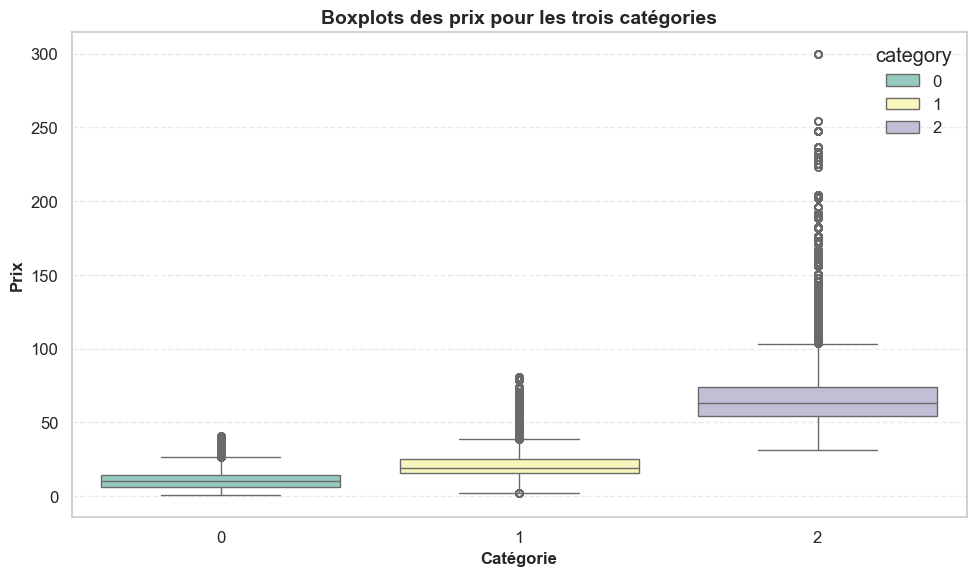

In [52]:
#Création d'une Boite à moustache de la répartition des prix pour chaque catégorie

# Vérification des colonnes et préparation des données
categories_to_plot = df_final['category'].unique()[:3]
data_filtered = df_final[df_final['category'].isin(categories_to_plot)]

# Création et affichage du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data_filtered,
    x='category',  # Axe x pour les catégories
    y='price',     # Axe y pour les prix
    hue='category',  # Assigner x à hue pour utiliser la palette
    palette="Set3",  # Palette de couleurs
    fliersize=5,     # Taille des points pour les outliers
    dodge=False      # Pas de séparation supplémentaire des boîtes
)

# Titre et labels
plt.title("Boxplots des prix pour les trois catégories", fontsize=14)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Prix", fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


## 4.2. Exploration par l'utilisation de méthode statistique

### 4.2.1. Identification par l'interval interquartil

In [53]:
# Calcul des statistiques descriptives par catégorie avec la fonction describe de Pandas
statistiques_par_categorie = df_final.groupby('category')['price'].describe()

# Afficher le tableau des statistiques descriptives par catégorie
print(statistiques_par_categorie)


             count       mean        std    min    25%    50%    75%     max
category                                                                    
0         415459.0  10.638188   4.933527   0.62   6.29   9.99  14.45   40.99
1         227169.0  20.485730   7.584894   2.00  15.81  19.08  24.98   80.99
2          36483.0  76.207412  39.749015  30.99  53.99  62.83  73.72  300.00


C:\Users\Willkommen\AppData\Local\Temp\ipykernel_27152\691605359.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistiques_par_categorie = df_final.groupby('category')['price'].describe()


In [54]:
# Calcul des statistiques descriptives par catégorie
statistiques_par_categorie = df_final.groupby('category')['price'].describe()

# Calcul des limites des outliers
IQR = statistiques_par_categorie['75%'] - statistiques_par_categorie['25%']
statistiques_par_categorie['Limite Inférieure'] = statistiques_par_categorie['25%'] - 1.5 * IQR
statistiques_par_categorie['Limite Supérieure'] = statistiques_par_categorie['75%'] + 1.5 * IQR

# Identifier les limites pour chaque catégorie
limite_inf = statistiques_par_categorie['Limite Inférieure']
limite_sup = statistiques_par_categorie['Limite Supérieure']

# Identifier si un produit est un outlier
df_final['Outlier'] = (df_final['price'] < limite_inf[df_final['category']].values) | \
                      (df_final['price'] > limite_sup[df_final['category']].values)

# Nombre total d'articles uniques par catégorie
articles_uniques = df_final.groupby('category')['product_id'].nunique()

# Nombre total d'outliers uniques par catégorie
outliers_uniques = df_final[df_final['Outlier']].groupby('category')['product_id'].nunique()

# Calcul du pourcentage d'outliers
outliers_percentage = (outliers_uniques / articles_uniques * 100).round(2)

# Résumé des résultats
summary = pd.DataFrame({
    'Total Articles Uniques': articles_uniques,
    'Outliers Uniques': outliers_uniques,
    'Pourcentage Outliers (%)': outliers_percentage
}).fillna(0)  # Remplacer les NaN par 0 pour les catégories sans outliers

# Résultats
print("\nStatistiques descriptives par catégorie (avec limites des outliers) :")
print(statistiques_par_categorie[['mean', 'std', 'Limite Inférieure', 'Limite Supérieure']])

print("\nRésumé des articles uniques et des outliers par catégorie :")
print(summary)

print(f"\nNombre total de produits uniques figurant comme outliers : {outliers_uniques.sum()}")


C:\Users\Willkommen\AppData\Local\Temp\ipykernel_27152\1121617709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistiques_par_categorie = df_final.groupby('category')['price'].describe()
C:\Users\Willkommen\AppData\Local\Temp\ipykernel_27152\1121617709.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  articles_uniques = df_final.groupby('category')['product_id'].nunique()



Statistiques descriptives par catégorie (avec limites des outliers) :
               mean        std  Limite Inférieure  Limite Supérieure
category                                                            
0         10.638188   4.933527             -5.950             26.690
1         20.485730   7.584894              2.055             38.735
2         76.207412  39.749015             24.395            103.315

Résumé des articles uniques et des outliers par catégorie :
          Total Articles Uniques  Outliers Uniques  Pourcentage Outliers (%)
category                                                                    
0                           2292               102                      4.45
1                            737               140                     19.00
2                            236               114                     48.31

Nombre total de produits uniques figurant comme outliers : 356


C:\Users\Willkommen\AppData\Local\Temp\ipykernel_27152\1121617709.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers_uniques = df_final[df_final['Outlier']].groupby('category')['product_id'].nunique()


Ces outliers sont-ils justifiés ?

Je réalise un graphique de dispersion de la variable 'price' pour chaque catégorie qui me permettra de déterminer l'approche appliquée.

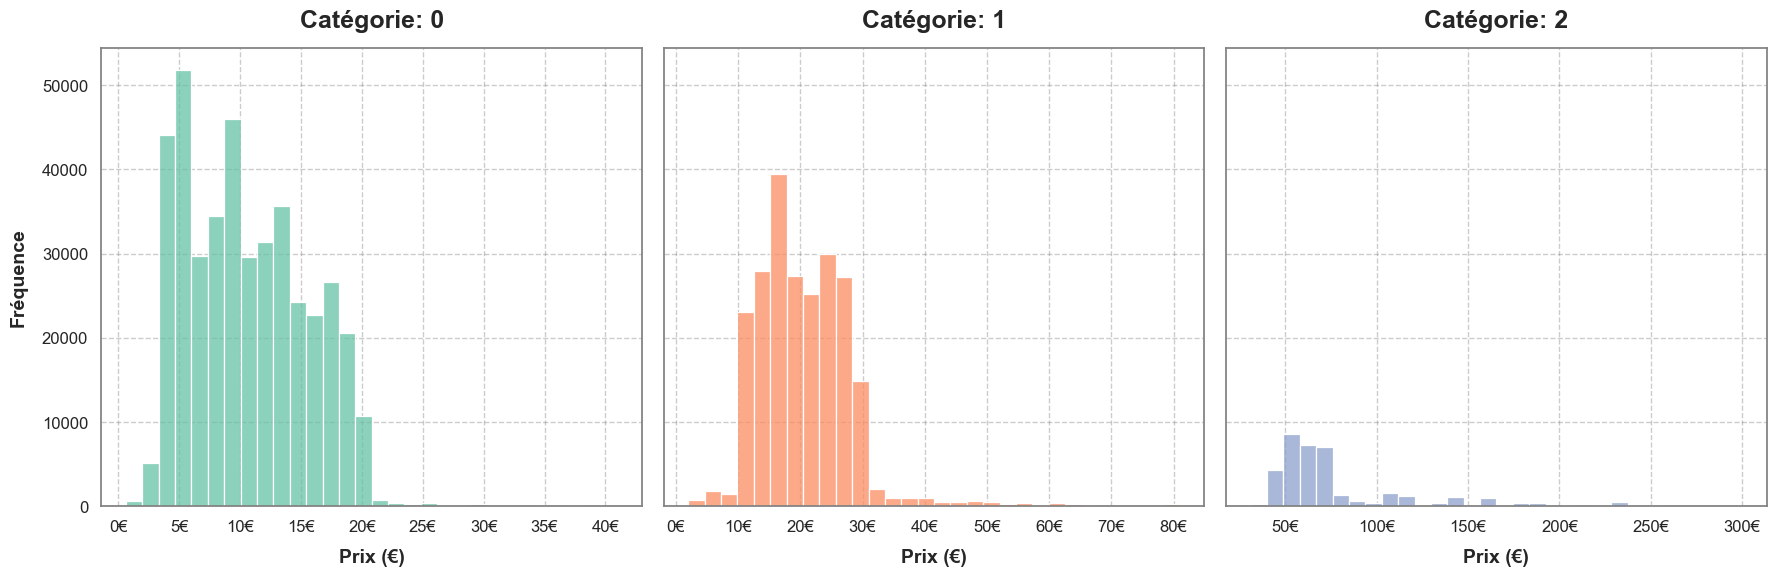

In [55]:
#Je définis un même jeu de couleurs pour les catégories que je pourrai utiliser par la suite
couleurs_categories = sns.color_palette("Set2", n_colors=3)  # 3 catégories ici : 0, 1, 2

# Dictionnaire pour associer chaque catégorie à sa couleur
couleurs_mapping = {
    '0': couleurs_categories[0],  # Couleur pour la catégorie 0
    '1': couleurs_categories[1],  # Couleur pour la catégorie 1
    '2': couleurs_categories[2],  # Couleur pour la catégorie 2
}

# Appliquer le template graphique
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams.update({
    "figure.figsize": (18, 6),  # Ajuste la taille de la figure pour 3 graphiques
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.titleweight": "bold",
    "axes.grid": True,
    "grid.alpha": 0.4,
    "grid.linestyle": "--",
    "grid.color": "grey",
    "axes.edgecolor": "grey",
})

# Catégories uniques
categories = df_final['category'].unique()

# Créer une figure avec 3 graphiques côte à côte
fig, axes = plt.subplots(1, 3, sharey=True)  # Partage de l'axe Y pour faciliter la comparaison

# Itérer sur les 3 premières catégories
for i, cat in enumerate(categories[:3]):
    # Obtenir la couleur pour la catégorie à partir du dictionnaire
    color = couleurs_mapping[str(cat)]  # Utilisation de la catégorie comme clé pour récupérer la couleur
    
    sns.histplot(
        df_final[df_final['category'] == cat]['price'], 
        kde=False,  # Ajoute la courbe de densité
        color=color,  # Couleur basée sur la catégorie
        bins=30,  # Ajuste le nombre de bins
        edgecolor=None,  # Aucune bordure sur les barres
        ax=axes[i]  # Graphique spécifique
    )
    # Ajouter le titre et les labels pour chaque sous-graphique
    axes[i].set_title(f"Catégorie: {cat}", pad=15)
    axes[i].set_xlabel("Prix (€)", labelpad=10)
    if i == 0:  # Ajouter le label de l'axe Y uniquement au premier graphique
        axes[i].set_ylabel("Fréquence", labelpad=10)

# Ajustement des ticks pour chaque graphique
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}€"))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0f}"))

# Ajuster les espaces entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

del categories, fig, axes, color

La catégorie "0" est composée de produits à des prix en majorité autour de 10 €, la catégorie "1" est plutôt autour de 20 € et enfin,  
la catégorie "2" est composée de produits bien plus chers.  
Compte tenu du domaine d'activité (librairie), je ne peux pas exclure les outliers de mon analyse, sans avoir, au préalable,  
consulté des experts métier ou ceux ayant une connaissance approfondie des produits. Je décide donc de les conserver pour la suite de mon analyse.

# 5. Analyses

## 5.1. Analyses du chiffre d'affaires

Je calcule le chiffre d'affaires du site de vente en ligne par année en k€

In [56]:
# Ajouter une colonne pour l'année
df_final['year'] = df_final['date'].dt.year  # Extraire l'année depuis la colonne 'date'

# Calculer le chiffre d'affaires en k€ par année
chiffre_affaires_annuel = (
    df_final.groupby('year')['price']
    .sum()
    .div(1000)  # Conversion en milliers d'euros
    .round(2)   # Arrondir à 2 décimales
    .reset_index()
    .rename(columns={'year': 'Année', 'price': 'Chiffre d\'affaires (k€)'})
)

# Ajouter une ligne pour le total
total_chiffre_affaires = chiffre_affaires_annuel['Chiffre d\'affaires (k€)'].sum()
chiffre_affaires_annuel = pd.concat(
    [
        chiffre_affaires_annuel,
        pd.DataFrame({'Année': ['Total'], 'Chiffre d\'affaires (k€)': [total_chiffre_affaires]})
    ],
    ignore_index=True
)

# Affichage du résultat
print(chiffre_affaires_annuel)

del chiffre_affaires_annuel, total_chiffre_affaires

   Année  Chiffre d'affaires (k€)
0   2021                  4770.83
1   2022                  6108.68
2   2023                   974.22
3  Total                 11853.73


J'affiche l'évolution mensuelle du chiffre d'affaires en k€ ainsi que sa moyenne mobile sur 3 mois

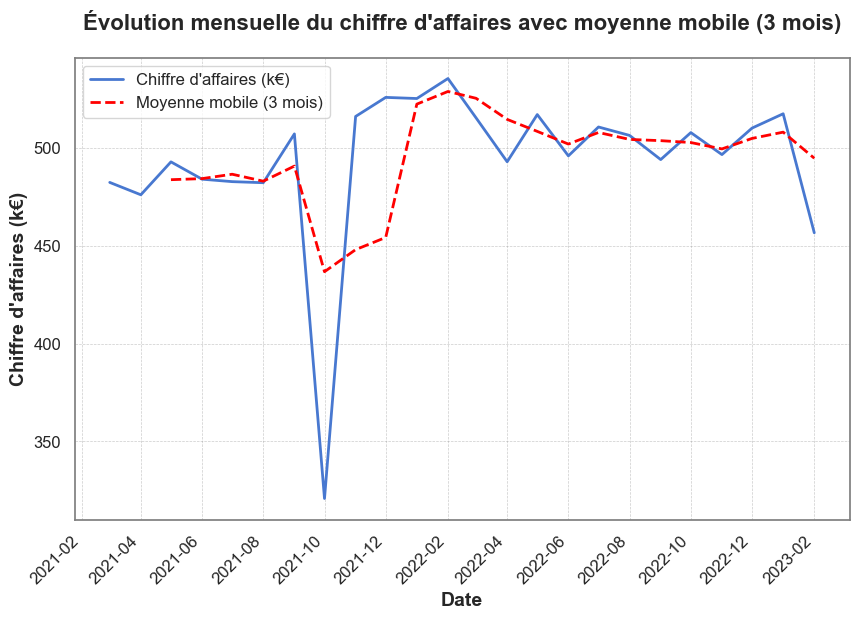

In [57]:
# Ajouter une colonne pour l'année et le mois
df_final['year_month'] = df_final['date'].dt.to_period('M').dt.to_timestamp()

# Calculer le chiffre d'affaires par mois
chiffre_affaires_mensuel = (
    df_final.groupby('year_month')['price']
    .sum()
    .div(1000)  # Conversion en milliers d'euros
    .reset_index()
    .rename(columns={'year_month': 'Date', 'price': 'Chiffre d\'affaires (k€)'})
)

# Calculer la moyenne mobile sur 3 mois
chiffre_affaires_mensuel['Moyenne mobile (3 mois)'] = (
    chiffre_affaires_mensuel['Chiffre d\'affaires (k€)']
    .rolling(window=3, min_periods=3)
    .mean()
)

# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer le chiffre d'affaires par mois
sns.lineplot(
    data=chiffre_affaires_mensuel,
    x='Date',
    y='Chiffre d\'affaires (k€)',
    ax=ax,
    label='Chiffre d\'affaires (k€)',
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0],  # Couleur primaire du template
    linewidth=2
)

# Tracer la moyenne mobile sur 3 mois
sns.lineplot(
    data=chiffre_affaires_mensuel,
    x='Date',
    y='Moyenne mobile (3 mois)',
    ax=ax,
    label='Moyenne mobile (3 mois)',
    color='red',
    linewidth=2,
    linestyle='--'
)

# Personnalisation du graphique
ax.set_title("Évolution mensuelle du chiffre d'affaires avec moyenne mobile (3 mois)", fontsize=16, pad=20)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Chiffre d'affaires (k€)", fontsize=14)

# Mise en forme des dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Afficher un mois sur deux
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format année-mois
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=12)

# Ajout de la légende
ax.legend(fontsize=12, loc='upper left', frameon=True)

# Afficher la grille
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Afficher le graphique
# plt.tight_layout()
plt.show()

del chiffre_affaires_mensuel

Je remarque une forte chute du chiffre d'affaires en 10/2021. Je dois investiguer pour en connaître la raison.  
Je vais donc afficher un graphique de l'évolution du chiffre d'affaires par catégories pour en savoir plus.  
Quant à la moyenne mobile, elle indique une tendance à la baisse du chiffre d'affaires depuis 02/2022.

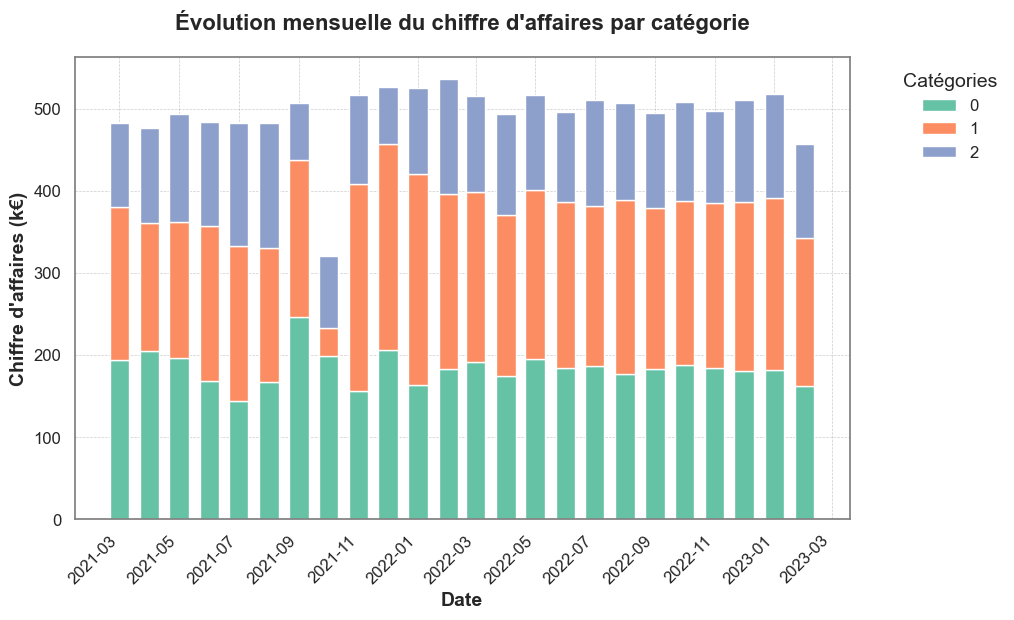

In [58]:
# Ajouter une colonne pour l'année et le mois
df_final['year_month'] = df_final['date'].dt.to_period('M').dt.to_timestamp()

# Calculer le chiffre d'affaires par catégorie et par mois
chiffre_affaires_categorie = (
    df_final.groupby(['year_month', 'category'], observed=False)['price']
    .sum()
    .div(1000)  # Conversion en milliers d'euros
    .reset_index()
    .rename(columns={'year_month': 'Date', 'price': 'Chiffre d\'affaires (k€)'})
)

# Pivot pour obtenir les catégories en colonnes
df_pivot = chiffre_affaires_categorie.pivot(
    index='Date', columns='category', values='Chiffre d\'affaires (k€)'
).fillna(0)

# Assurez-vous que 'Date' est une colonne plutôt que l'index
df_pivot.reset_index(inplace=True)

# Créer un graphique de barres empilées
fig, ax = plt.subplots(figsize=(10, 6))

# Utiliser le dictionnaire couleurs_mapping pour les catégories
# Filtrer les colonnes de catégorie et récupérer leurs couleurs respectives
categories = df_pivot.columns[1:]  # Ignorer la première colonne 'Date'
couleurs = [couleurs_mapping.get(str(cat), "gray") for cat in categories]

# Tracer les barres empilées pour chaque catégorie
bottom_values = None
for idx, column in enumerate(categories):  # Ignorer la première colonne 'Date'
    ax.bar(
        df_pivot['Date'],  # Utiliser la colonne Date
        df_pivot[column],
        bottom=bottom_values,
        label=column,
        color=couleurs[idx],  # Couleur associée à la catégorie
        width=20  # Ajuster la largeur des barres pour les rendre visibles
    )
    bottom_values = (
        df_pivot[column]
        if bottom_values is None
        else bottom_values + df_pivot[column]
    )

# Personnalisation du graphique
ax.set_title("Évolution mensuelle du chiffre d'affaires par catégorie", fontsize=16, pad=20)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Chiffre d'affaires (k€)", fontsize=14)

# Mise en forme des dates sur l'axe x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Afficher un mois sur deux
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format année-mois
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=12)

# Ajouter une légende
ax.legend(
    title="Catégories",
    fontsize=12,
    title_fontsize=14,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

# Afficher la grille
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajuster l'affichage pour éviter que la légende ne chevauche le graphique
# plt.tight_layout()

# Afficher le graphique
plt.show()

del chiffre_affaires_categorie, df_pivot, bottom_values

La chute du chiffre d'affaires en 10/2021 concerne principalement la catégorie 1 des produits.  
Je dois connaître la raison.  
Je vais donc afficher le graphique de l'évolution du chiffre d'affaires de la catégorie 1 par jour.

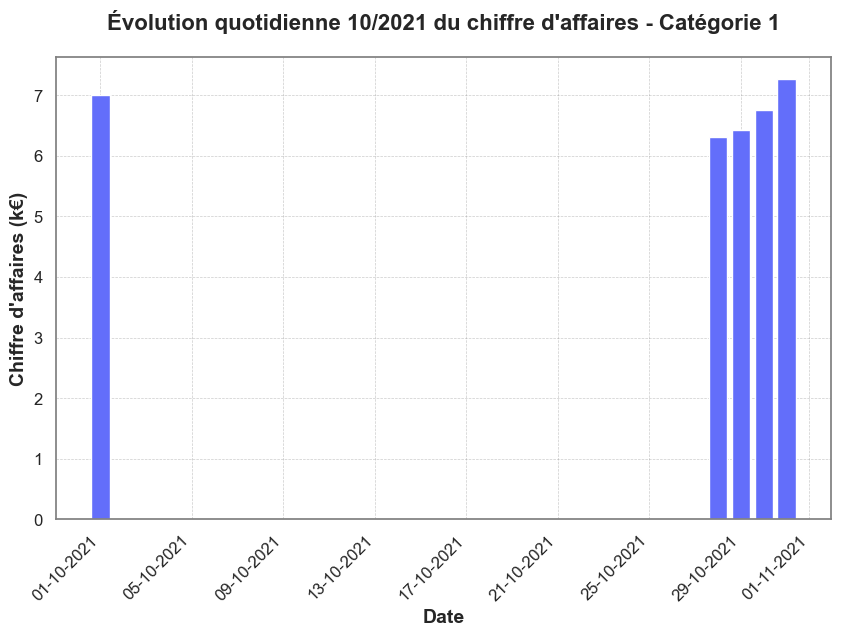

In [59]:
# Ajouter une colonne pour la date sans les heures
df_final['year_month_day'] = df_final['date'].dt.normalize()

df_final['category'] = df_final['category'].astype(str)

# Puis filtrer :
df_categorie1 = df_final[(df_final['category'] == '1') &
    (df_final['year_month_day'] >= '2021-10-01') &
    (df_final['year_month_day'] <= '2021-10-31')]

# Calculer le chiffre d'affaires quotidien pour la catégorie 1
chiffre_affaires_jour = (
    df_categorie1.groupby('year_month_day')['price']
    .sum()
    .div(1000)  # Conversion en milliers d'euros
    .reset_index()
    .rename(columns={'year_month_day': 'Date_jour', 'price': 'Chiffre d\'affaires (k€)'})
)

# Créer le graphique à barres
fig, ax = plt.subplots(figsize=(10, 6))

# Appliquer les paramètres de style du template graphique
sns.set_style("whitegrid")  # Style moderne et épuré
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.alpha': 0.4,
    'figure.figsize': (10, 6)
})

# Tracer les barres
ax.bar(
    chiffre_affaires_jour['Date_jour'], 
    chiffre_affaires_jour['Chiffre d\'affaires (k€)'], 
    color='#636EFA', 
    width=0.8
)

# Personnalisation du graphique
ax.set_title("Évolution quotidienne 10/2021 du chiffre d'affaires - Catégorie 1", fontsize=16, pad=20)
ax.set_xlabel("Date")
ax.set_ylabel("Chiffre d'affaires (k€)")

# Mise en forme des dates sur l'axe x
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Afficher les jours par semaine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Format jour-mois-année
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Afficher la grille
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5)

# Ajuster l'affichage pour éviter les chevauchements
# plt.tight_layout()

# Afficher le graphique
plt.show()

del df_categorie1, chiffre_affaires_jour

L'interprétation du graphique nous laisse à penser qu'il n'y a pas eu de chiffre d'affaires pour la catégorie '1' du 02/10/2021 au 27/10/2021. Seuls 5 jours contiennent des données.  
2 raisons possibles : soit les données pour cette période ne sont pas remontées, soit il n'y a effectivement pas eu de transactions pendant cette période.  
Au vu des mois qui précèdent et ceux qui suivent, je pars du principe que les données ne sont pas remontées.  
Il y aura lieu de s'en assurer auprès des personnes responsables.

Proposition de solutions pour 10/2021 :  
* Estimation par moyenne ou médiane (Si les données sont relativement stables dans le temps)    
  * Moyenne temporelle : Utiliser la moyenne des valeurs enregistrées de la catégorie 1 sur des périodes simultanées (par exemple, le même mois de l'année précédente ou le mois précédent et suivant en 2021).  
  * Médiane temporelle : Si les données sont sujettes à des valeurs aberrantes, les remplacer par la médiane  
* Interpolation temporelle (Si les données manquantes sont au milieu d'une série continue)  
  * Utiliser une interpolation linéaire pour combler les valeurs en fonction des observations avant et après la période manquante.  
  * Pour des séries plus complexes (non linéaires), des interpolations polynomiales ou basées sur des splines peuvent être appliquées.  
* Analyse saisonnière et tendance (Si les données montrent des motifs saisonniers ou cycliques)  
  * Décomposer la série temporelle en tendance, saisonnalité et résidu.  
* Estimation par régression (Si nous disposons de données d'autres catégories ou d'autres variables (par exemple, volume total des ventes, jour de la semaine))  
  * Construire un modèle (régression linéaire) pour estimer les valeurs manquantes de la catégorie 1.

Je continue mes analyses en conservant les données 10/2021 telles quelles.    
Je vais maintenant afficher le graphique de la proportion de chiffre d'affaires par catégorie.

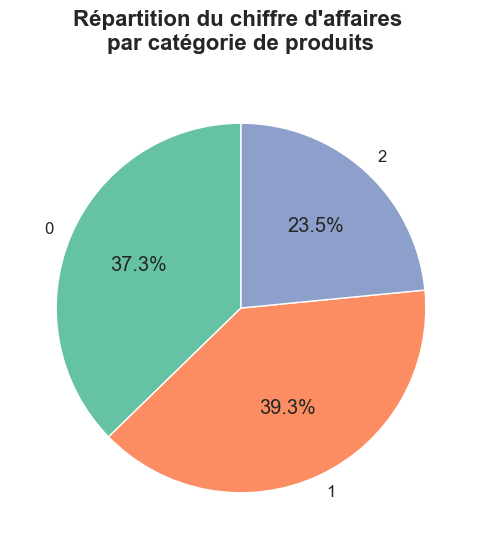

In [60]:
# Assurez-vous d'utiliser le même jeu de couleurs que pour le graphique de barres empilées
couleurs_categories = sns.color_palette("Set2", n_colors=3)  # 3 catégories ici : 0, 1, 2

# Dictionnaire pour associer chaque catégorie à sa couleur
couleurs_mapping = {
    '0': couleurs_categories[0],  # Couleur pour la catégorie 0
    '1': couleurs_categories[1],  # Couleur pour la catégorie 1
    '2': couleurs_categories[2],  # Couleur pour la catégorie 2
}

# Calculer le chiffre d'affaires total par catégorie
chiffre_affaires_categorie_total = (
    df_final.groupby('category')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'Chiffre d\'affaires'})
)

# Générer la liste de couleurs en respectant l'ordre des catégories
couleurs_pie = [
    couleurs_mapping[str(cat)] 
    for cat in chiffre_affaires_categorie_total['category']
]

# Créer le graphique en secteurs
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(
    chiffre_affaires_categorie_total['Chiffre d\'affaires'], 
    labels=chiffre_affaires_categorie_total['category'], 
    autopct='%1.1f%%',  # Afficher les pourcentages avec 1 décimale
    startangle=90,      # Faire démarrer le graphique à 90°
    colors=couleurs_pie,  # Utiliser les couleurs harmonisées
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}  # Moderniser le design
)

# Ajouter un titre
ax.set_title("Répartition du chiffre d'affaires \npar catégorie de produits", fontsize=16, pad=20)

# Afficher le graphique
# plt.tight_layout()
plt.show()

del chiffre_affaires_categorie_total, couleurs_pie

Les catégories '0' et '1' génèrent un chiffre d'affaires comparable. Quant au chiffre d'affaires généré par la catégorie '2', il est inférieur.

La dernière analyse du chiffre d'affaires consiste à afficher le top et flop 5 des produits.

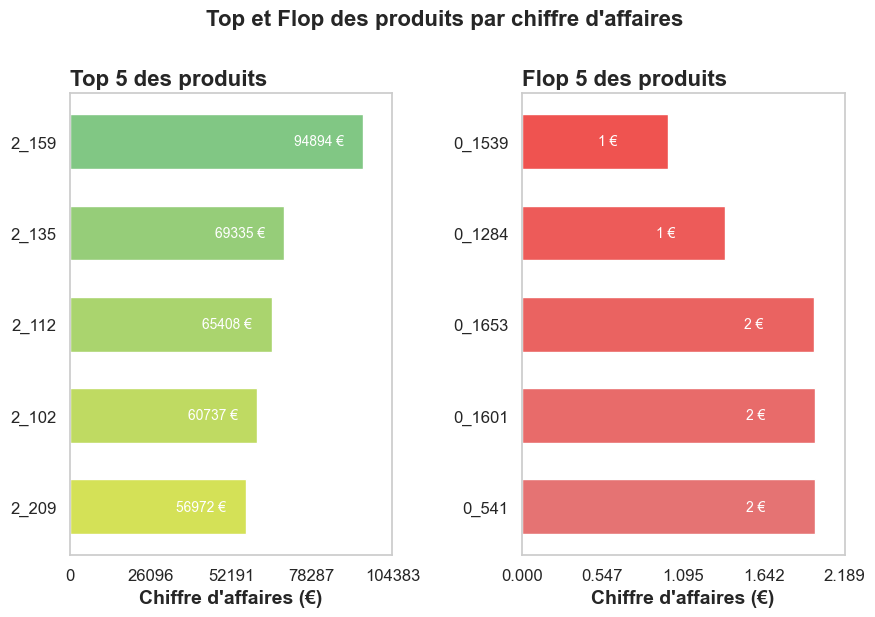

In [61]:
from matplotlib.colors import LinearSegmentedColormap

# Calculer le chiffre d'affaires par produit
chiffre_affaires_produit = (
    df_final.groupby('product_id')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'Chiffre d\'affaires (€)'})
)

# Trier pour obtenir le top 5 et le flop 5
top_5_produits = chiffre_affaires_produit.nlargest(5, 'Chiffre d\'affaires (€)').sort_values(by='Chiffre d\'affaires (€)')
flop_5_produits = chiffre_affaires_produit.nsmallest(5, 'Chiffre d\'affaires (€)').sort_values(by='Chiffre d\'affaires (€)', ascending=False)

# Appliquer le style du template graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (12, 6)
})

# Créer les dégradés de couleurs
couleur_top = LinearSegmentedColormap.from_list("top_gradient", ['#d4e157', '#81c784'])
couleur_flop = LinearSegmentedColormap.from_list("flop_gradient", ['#e57373', '#ef5350'])

# Créer la figure avec deux axes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'wspace': 0.4, 'width_ratios': [1, 1]})

# Graphique 1 : Top 5
bar_top = axs[0].barh(
    top_5_produits['product_id'],
    top_5_produits['Chiffre d\'affaires (€)'],
    color=couleur_top(np.linspace(0, 1, len(top_5_produits))),
    height=0.6,
    zorder=2
)

# Ajouter les valeurs sur les barres (alignées à droite)
axs[0].bar_label(
    bar_top,
    fmt='%.0f €',
    padding=-50,
    color='white',
    fontsize=10
)

axs[0].set_title("Top 5 des produits", loc='left')
axs[0].set_xlabel("Chiffre d'affaires (€)")
axs[0].set_xlim(0, top_5_produits['Chiffre d\'affaires (€)'].max() * 1.1)

# Graphique 2 : Flop 5
bar_flop = axs[1].barh(
    flop_5_produits['product_id'],
    flop_5_produits['Chiffre d\'affaires (€)'],
    color=couleur_flop(np.linspace(0, 1, len(flop_5_produits))),
    height=0.6,
    zorder=2
)

# Ajouter les valeurs sur les barres (alignées à droite)
axs[1].bar_label(
    bar_flop,
    fmt='%.0f €',
    padding=-50,
    color='white',
    fontsize=10
)

axs[1].set_title("Flop 5 des produits", loc='left')
axs[1].set_xlabel("Chiffre d'affaires (€)")
axs[1].set_xlim(0, flop_5_produits['Chiffre d\'affaires (€)'].max() * 1.1)

# Ajuster les limites et le formatage des ticks
for ax in axs:
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=5))
    ax.grid(visible=False)

# Ajouter un titre général en gras
fig.suptitle("Top et Flop des produits par chiffre d'affaires", fontsize=16, fontweight='bold', y=1.02)

# Ajuster l'affichage
plt.show()

del chiffre_affaires_produit, top_5_produits, flop_5_produits, couleur_top, couleur_flop, bar_top, bar_flop

Le top 5 des produits ne nous apportent pas grand-chose.  
En parcourant le flop 5 des produits, nous pouvons en déduire que certains produits n'ont été vendus qu'une seule fois.

## 5.2. Analyses des clients

In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679111 entries, 0 to 679110
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   session_id      679111 non-null  object        
 1   date            679111 non-null  datetime64[ns]
 2   product_id      679111 non-null  object        
 3   category        679111 non-null  object        
 4   price           679111 non-null  float64       
 5   client_id       679111 non-null  object        
 6   gender          679111 non-null  category      
 7   birth_year      679111 non-null  int64         
 8   Outlier         679111 non-null  bool          
 9   year            679111 non-null  int32         
 10  year_month      679111 non-null  datetime64[ns]
 11  year_month_day  679111 non-null  datetime64[ns]
dtypes: bool(1), category(1), datetime64[ns](3), float64(1), int32(1), int64(1), object(4)
memory usage: 50.5+ MB


Je commence par afficher le nombre de clients uniques par année ayant acheté des produits.

In [63]:
# Grouper par année et dénombrer les clients uniques
clients_par_annee = (
    df_final.groupby('year')['client_id']
    .nunique()
    .reset_index()
    .rename(columns={'year': 'Année', 'client_id': 'Nombre de clients uniques'})
)

# Ajouter une ligne pour le total
total_clients = pd.DataFrame({
    'Année': ['Total'],
    'Nombre de clients uniques': [clients_par_annee['Nombre de clients uniques'].sum()]
})

clients_par_annee = pd.concat([clients_par_annee, total_clients], ignore_index=True)

# Affichage du résultat
print(clients_par_annee)

del clients_par_annee, total_clients

   Année  Nombre de clients uniques
0   2021                       8579
1   2022                       8522
2   2023                       7085
3  Total                      24186


Sur 2 mois d'activité en 2023, je note que déjà 7085 clients uniques nous ont passé des commandes.  
Cela est très positif.

J'affiche maintenant l'évolution mensuelle du nombre de clients uniques nous ayant passé des commandes.

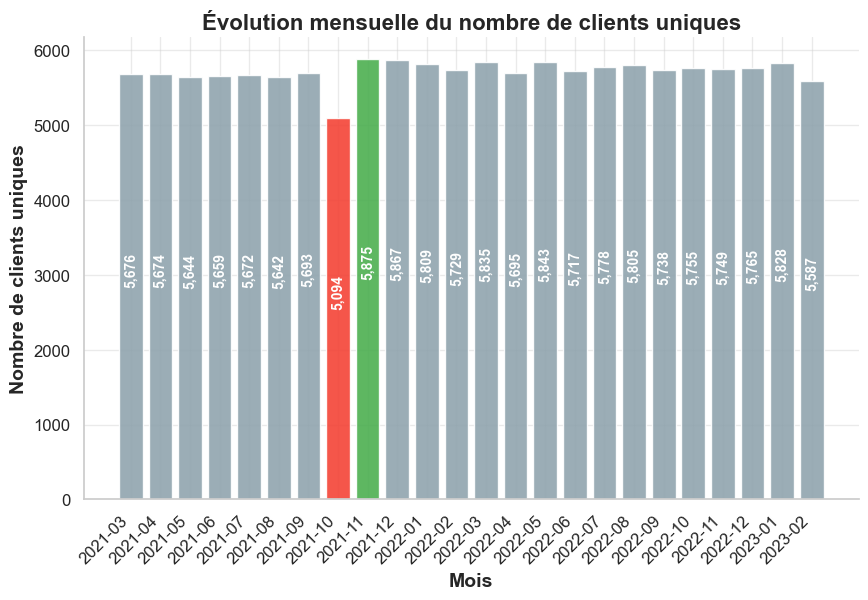

In [64]:
# Grouper par mois et dénombrer les clients uniques
clients_par_mois = (
    df_final.groupby('year_month')['client_id']
    .nunique()
    .reset_index()
    .rename(columns={'client_id': 'Nombre de clients uniques'})
)

# Identifier les mois avec le maximum et le minimum de clients uniques
max_clients = clients_par_mois['Nombre de clients uniques'].max()
min_clients = clients_par_mois['Nombre de clients uniques'].min()

# Créer une liste de couleurs en fonction des valeurs max et min
colors = [
    '#4CAF50' if x == max_clients else
    '#F44336' if x == min_clients else
    '#90A4AE'  # Couleur neutre
    for x in clients_par_mois['Nombre de clients uniques']
]

# Configurer le style graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(
    clients_par_mois['year_month'].dt.strftime('%Y-%m'),  # Formatage des mois en texte
    clients_par_mois['Nombre de clients uniques'],
    color=colors,
    alpha=0.9,  # Transparence légère
)

# Ajouter les valeurs à l'intérieur des barres (verticalement)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,  # Centrer verticalement dans la barre
        f'{int(bar.get_height()):,}',  # Format avec séparateur de milliers
        ha='center',
        va='bottom',
        rotation=90,
        fontsize=10,
        color='white',  # Texte en blanc pour contraste
        fontweight='bold'
    )

# Titre et labels
plt.title("Évolution mensuelle du nombre de clients uniques", fontweight='bold')
plt.xlabel("Mois")
plt.ylabel("Nombre de clients uniques")
plt.xticks(rotation=45, ha='right')  # Rotation des labels de l'axe X

# Supprimer les bordures supérieures et droites pour un style moderne
sns.despine()

# Ajuster la mise en page et afficher
# plt.tight_layout()
plt.show()

del clients_par_mois, max_clients, min_clients, colors

Le meilleur mois en terme de nombre de clients uniques est 11/2021.  
Le résultat du mois 10/2021 s'explique par les données qui ne sont pas remontées.  
Je note également une grande stabilité mensuelle en nombre de clients uniques nous ayant passé des commandes.

Je vais classer les chiffres d'affaires par client pour me faire une idée des proportions et savoir si certains clients génèrent de grosses parts de chiffre d'affaires.

In [65]:
# Calculer le chiffre d'affaires total par client
chiffre_affaires_par_client = (
    df_final.groupby('client_id')['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'Chiffre d\'affaires (€)'})
)

# Trier par chiffre d'affaires, décroissant
top_10_clients = chiffre_affaires_par_client.nlargest(10, 'Chiffre d\'affaires (€)')

# Afficher les 10 meilleurs clients
print(top_10_clients)

del chiffre_affaires_par_client, top_10_clients

     client_id  Chiffre d'affaires (€)
677     c_1609               324033.35
4388    c_4958               289760.34
6337    c_6714               153598.92
2724    c_3454               113637.93
2513    c_3263                 5276.87
634     c_1570                 5271.62
2108    c_2899                 5214.05
1268    c_2140                 5208.82
7006    c_7319                 5155.77
7715    c_7959                 5085.45


&#9888; Il y a un très grand écart de chiffre d'affaires entre les 4 plus gros clients et les suivants. On peut supposer que les clients en haut de classement ne sont pas des clients classiques. C'est à dire qu'au lieu d'être des particuliers on peut penser qu'ils correspondent à des professionnels. Il faudra garder cela en tête lors de l'analyse des comportements clients et nous allons déjà enregistrer leur identifiant.

In [66]:
# Trier les clients par chiffre d'affaires
clients_pro = df_final.groupby('client_id')['price'].sum().nlargest(4).index.tolist()

# Afficher la liste des 4 premiers clients
print("Les clients professionnels :", clients_pro)


Les clients professionnels : ['c_1609', 'c_4958', 'c_6714', 'c_3454']


Pour la suite de mes analyses, j'excluerai les clients professionnels.

Quelle est la proportion des clients par genre ?

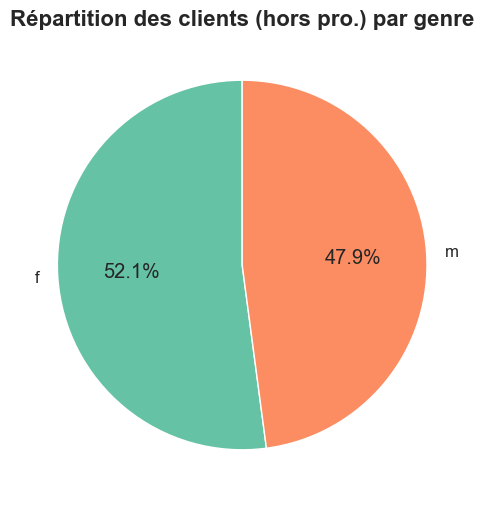

In [67]:
# Exclure les clients professionnels de la répartition par genre
df_non_pro = df_final[~df_final['client_id'].isin(clients_pro)]  # Exclure les top 4 clients

# Supprimer les doublons basés sur client_id en gardant la première occurrence
df_non_pro = df_non_pro.drop_duplicates(subset='client_id', keep='first').copy()

# Calculer la répartition par genre en pourcentage pour les clients non professionnels
genre_repartition_non_pro = (
    df_non_pro['gender']
    .value_counts(normalize=True)  # Obtenir les proportions
    .rename_axis('Genre')  # Renommer l'index
    .reset_index(name='Pourcentage')  # Transformer en DataFrame
)
genre_repartition_non_pro['Pourcentage'] *= 100  # Convertir en pourcentage

# Utiliser la palette Set2 de Seaborn pour les couleurs
colors = sns.color_palette("Set2", n_colors=len(genre_repartition_non_pro))

# Configurer le style du graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Création du graphique en secteur
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer le graphique
wedges, texts, autotexts = ax.pie(
    genre_repartition_non_pro['Pourcentage'],  # Valeurs en pourcentage
    labels=genre_repartition_non_pro['Genre'],  # Libellés des genres
    autopct='%.1f%%',  # Format pourcentage
    startangle=90,  # Commencer à 90° pour une orientation propre
    colors=colors,  # Couleurs Set2
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Bordures fines blanches entre les parts
)

# Ajouter un titre
ax.set_title("Répartition des clients (hors pro.) par genre", fontweight='bold', fontsize=16)

# Supprimer la bordure du graphique pour un style plus moderne
# plt.tight_layout()
plt.show()


Notre clientèle est majoritairement représentée par des femmes.

Quelles sont les âges par genre les plus représentés ?  
Je vais afficher la distribution par genre des âges.

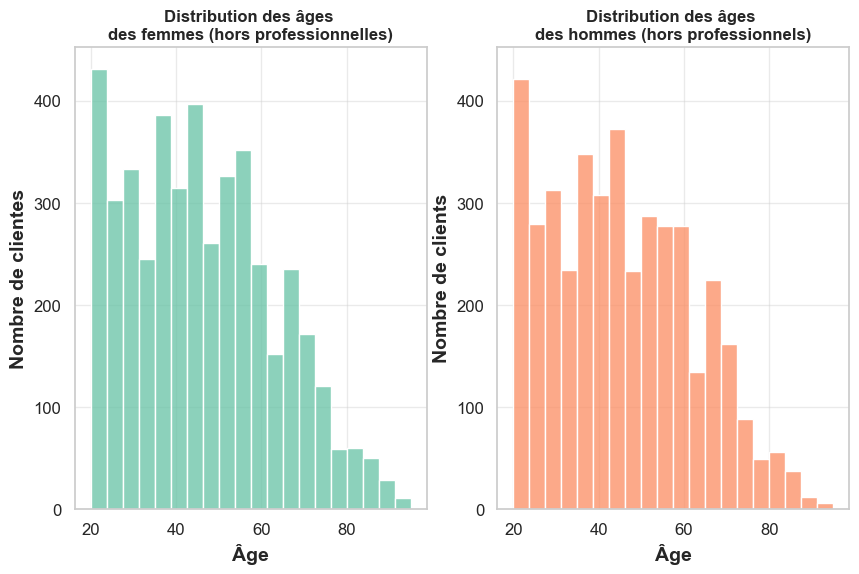

In [68]:
# Supprimer les doublons basés sur client_id en gardant la première occurrence
df_non_pro_unique = df_non_pro.drop_duplicates(subset='client_id', keep='first').copy()

# Calcul de l'âge des clients en utilisant l'année actuelle
current_year = 2024  # Remplacez par l'année actuelle
df_non_pro_unique.loc[:, 'age'] = current_year - df_non_pro_unique['birth_year']

# Filtrer les données pour femmes et hommes
df_femmes = df_non_pro_unique[df_non_pro_unique['gender'] == 'f']
df_hommes = df_non_pro_unique[df_non_pro_unique['gender'] == 'm']

# Créer la figure avec deux sous-graphiques sur la même ligne
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Couleurs spécifiques pour les genres (utilisation de Set2)
colors = sns.color_palette("Set2", n_colors=2)  # 2 couleurs : une pour chaque genre

# Distribution des âges pour les femmes (à gauche)
sns.histplot(df_femmes['age'], kde=False, color=colors[0], ax=axes[0], bins=20)
axes[0].set_title("Distribution des âges \ndes femmes (hors professionnelles)", fontsize=12, fontweight='bold')
axes[0].set_xlabel('Âge', fontsize=14)
axes[0].set_ylabel('Nombre de clientes', fontsize=14)

# Distribution des âges pour les hommes (à droite)
sns.histplot(df_hommes['age'], kde=False, color=colors[1], ax=axes[1], bins=20)
axes[1].set_title("Distribution des âges \ndes hommes (hors professionnels)", fontsize=12, fontweight='bold')
axes[1].set_xlabel('Âge', fontsize=14)
axes[1].set_ylabel('Nombre de clients', fontsize=14)

# Ajuster les limites de l'axe Y pour que les graphiques aient les mêmes échelles
max_y = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])  # La valeur maximale sur l'axe Y
axes[0].set_ylim(0, max_y)  # Appliquer la même échelle sur l'axe Y du graphique des femmes
axes[1].set_ylim(0, max_y)  # Appliquer la même échelle sur l'axe Y du graphique des hommes

# Améliorer l'affichage et le style des graphiques
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Ajuster l'affichage
# plt.tight_layout()
plt.show()


En comparant ces 2 graphiques, je m'aperçois que les 2 distributions des âges par genre sont sensiblement identiques.  
Les données statistiques qui suivent nous le prouvent.

In [69]:
display(df_non_pro_unique.groupby(['gender'], observed=False)['age'].describe().T)

del df_non_pro, genre_repartition_non_pro, df_non_pro_unique, current_year, df_femmes, df_hommes, max_y

gender,f,m
count,4478.000000,4118.000000
mean,46.025011,45.429335
std,17.092603,16.706855
min,20.000000,20.000000
25%,32.000000,32.000000
50%,45.000000,44.000000
75%,58.000000,58.000000
max,95.000000,95.000000


Les âges minimum de 20 ans et maximum de 95 ans sont identiques chez les femmes et les hommes.  
Seule la médiane diffère d'une année.

J'affiche maintenant sous forme de courbe de Lorenz le 20/80 des clients en chiffre d'affaires.  

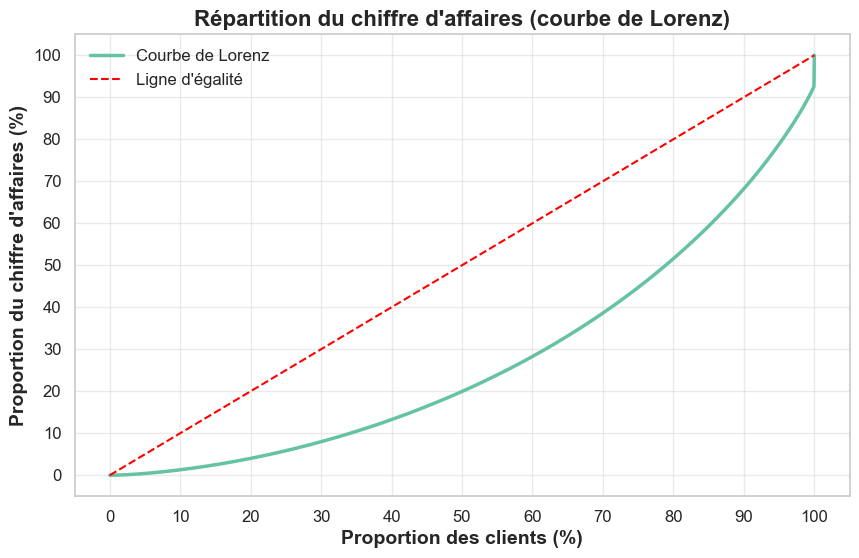

In [70]:
# Calculer les proportions cumulées et trier les données par CA croissant
df = df_final.groupby('client_id', as_index=False)['price'].sum()
df_sorted = df.sort_values(by='price')
df_sorted['cumulative_CA'] = df_sorted['price'].cumsum() / df_sorted['price'].sum()
df_sorted['cumulative_clients'] = np.arange(1, len(df_sorted) + 1) / len(df_sorted)

# Configurer le style du graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

fig, ax = plt.subplots(figsize=(10, 6))

# Tracer la courbe de Lorenz avec une ligne plus épaisse
ax.plot(
    df_sorted['cumulative_clients'] * 100,  # En pourcentage pour l'axe des x
    df_sorted['cumulative_CA'] * 100,      # En pourcentage pour l'axe des y
    label='Courbe de Lorenz',
    color=sns.color_palette("Set2")[0],
    linewidth=2.5  # Épaisseur de la ligne
)

# Tracer la ligne d'égalité
ax.plot(
    [0, 100], [0, 100],  # Ajusté pour correspondre aux pourcentages
    color='red', linestyle='--', label="Ligne d'égalité"
)

# Ajouter des labels et un titre
ax.set_title("Répartition du chiffre d'affaires (courbe de Lorenz)", fontweight='bold', fontsize=16)
ax.set_xlabel("Proportion des clients (%)", fontsize=14)
ax.set_ylabel("Proportion du chiffre d'affaires (%)", fontsize=14)

# Ajuster les ticks pour afficher des pourcentages
ax.set_xticks(range(0, 101, 10))
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis='both', which='major', labelsize=12)

# Ajouter une légende
ax.legend()

# Améliorer l'espacement
# plt.tight_layout()

# Afficher le graphique
plt.show()

del df, df_sorted

Nous pouvons lire que 50% des clients, y compris les clients pro, génèrent 20% du chiffre d'affaires.  
La part de chiffre d'affaires générées par les clients pro est représentée par l'augmentation verticale de la courbe à l'extrémité droite du graphique.

## 5.3. Analyses des produits

In [71]:
# Calculer le nombre total de produits uniques
total_products = df_final['product_id'].nunique()

# Afficher le résultat
print(f"Nombre total de produits uniques : {total_products}")

del total_products

Nombre total de produits uniques : 3265


Pour la 1ère analye des produits, j'affiche le top et flop 5 des produits en quantité vendue.

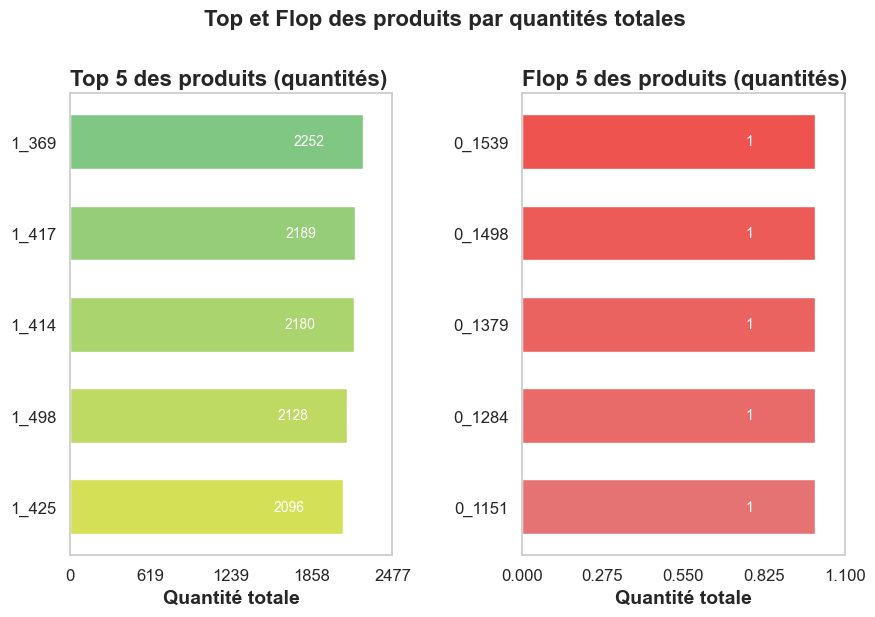

In [72]:
# Calculer les occurrences de chaque produit
quantite_produit = (
    df_final.groupby('product_id')
    .size()
    .reset_index(name='Quantité totale')
)

# Trier pour obtenir le top 5 et le flop 5
top_5_quantites = quantite_produit.nlargest(5, 'Quantité totale').sort_values(by='Quantité totale')
flop_5_quantites = quantite_produit.nsmallest(5, 'Quantité totale').sort_values(by='Quantité totale', ascending=False)

# Appliquer le style du template graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Créer les dégradés de couleurs
couleur_top = LinearSegmentedColormap.from_list("top_gradient", ['#d4e157', '#81c784'])
couleur_flop = LinearSegmentedColormap.from_list("flop_gradient", ['#e57373', '#ef5350'])

# Créer la figure avec deux axes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'wspace': 0.4, 'width_ratios': [1, 1]})

# Graphique 1 : Top 5
bar_top = axs[0].barh(
    top_5_quantites['product_id'],
    top_5_quantites['Quantité totale'],
    color=couleur_top(np.linspace(0, 1, len(top_5_quantites))),
    height=0.6,
    zorder=2
)

# Ajouter les valeurs sur les barres (alignées à droite)
axs[0].bar_label(
    bar_top,
    fmt='%.0f',
    padding=-50,
    color='white',
    fontsize=10
)

axs[0].set_title("Top 5 des produits (quantités)", loc='left')
axs[0].set_xlabel("Quantité totale")
axs[0].set_xlim(0, top_5_quantites['Quantité totale'].max() * 1.1)

# Graphique 2 : Flop 5
bar_flop = axs[1].barh(
    flop_5_quantites['product_id'],
    flop_5_quantites['Quantité totale'],
    color=couleur_flop(np.linspace(0, 1, len(flop_5_quantites))),
    height=0.6,
    zorder=2
)

# Ajouter les valeurs sur les barres (alignées à droite)
axs[1].bar_label(
    bar_flop,
    fmt='%.0f',
    padding=-50,
    color='white',
    fontsize=10
)

axs[1].set_title("Flop 5 des produits (quantités)", loc='left')
axs[1].set_xlabel("Quantité totale")
axs[1].set_xlim(0, flop_5_quantites['Quantité totale'].max() * 1.1)

# Ajuster les limites et le formatage des ticks
for ax in axs:
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=5))
    ax.grid(visible=False)

# Ajouter un titre général en gras
fig.suptitle("Top et Flop des produits par quantités totales", fontsize=16, fontweight='bold', y=1.02)

# Ajuster l'affichage
plt.show()

del quantite_produit, top_5_quantites, flop_5_quantites, couleur_top, couleur_flop, bar_top, bar_flop

Je remarque que le top 5 des produits en quantité vendues ne correspond pas au top 5 des produits en chiffre d'affaires. Cela signifie que ce n'est pas  
parce que les quantités sont élevées que le chiffre d'affaires généré est élevé.  
Le graphique des flops 5 nous confirme notre remarque faite précédemment au niveau des flops 5 des produits en chiffre d'affaires.

J'affiche également l'évolution mensuelle du nombre de produits vendus.

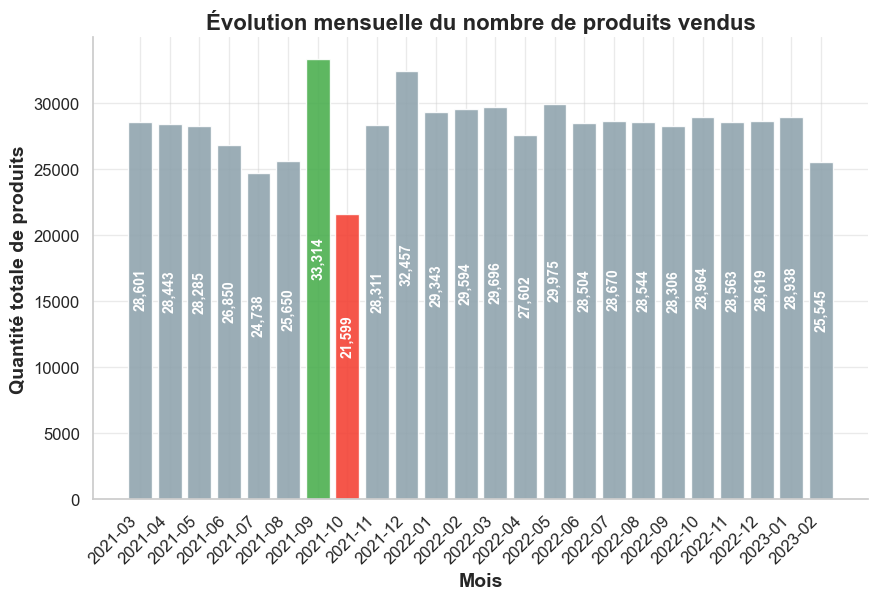

In [73]:
# Grouper par mois et dénombrer les produits vendus (occurrences de product_id)
produits_par_mois = (
    df_final.groupby('year_month')['product_id']
    .count()
    .reset_index()
    .rename(columns={'product_id': 'Quantité totale de produits'})
)

# Identifier les mois avec le maximum et le minimum de quantités
max_quantite = produits_par_mois['Quantité totale de produits'].max()
min_quantite = produits_par_mois['Quantité totale de produits'].min()

# Créer une liste de couleurs en fonction des valeurs max et min
colors = [
    '#4CAF50' if x == max_quantite else
    '#F44336' if x == min_quantite else
    '#90A4AE'  # Couleur neutre
    for x in produits_par_mois['Quantité totale de produits']
]

# Configurer le style graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(
    produits_par_mois['year_month'].dt.strftime('%Y-%m'),  # Formatage des mois en texte
    produits_par_mois['Quantité totale de produits'],
    color=colors,
    alpha=0.9,  # Transparence légère
)

# Ajouter les valeurs à l'intérieur des barres (verticalement)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,  # Centrer verticalement dans la barre
        f'{int(bar.get_height()):,}',  # Format avec séparateur de milliers
        ha='center',
        va='bottom',
        rotation=90,
        fontsize=10,
        color='white',  # Texte en blanc pour contraste
        fontweight='bold'
    )

# Titre et labels
plt.title("Évolution mensuelle du nombre de produits vendus", fontweight='bold')
plt.xlabel("Mois")
plt.ylabel("Quantité totale de produits")
plt.xticks(rotation=45, ha='right')  # Rotation des labels de l'axe X

# Supprimer les bordures supérieures et droites pour un style moderne
sns.despine()

# Ajuster la mise en page et afficher
# plt.tight_layout()
plt.show()

del produits_par_mois, max_quantite, min_quantite, colors, bars

Cette fois-ci, c'est le mois 09/2021 qui présente le meilleur score en terme de nombre de produits vendus.  
Je réitère ma remarque précédente concernant le mois 10/2021.

In [74]:
# Calculer le nombre de produits uniques par catégorie
produits_uniques_par_categorie = df_final.groupby('category')['product_id'].nunique()

# Ajouter une ligne pour le total
produits_uniques_par_categorie.loc['Total'] = produits_uniques_par_categorie.sum()

# Afficher le résultat
print('Nombre de produits par catégorie')
print(produits_uniques_par_categorie)

del produits_uniques_par_categorie

Nombre de produits par catégorie
category
0        2292
1         737
2         236
Total    3265
Name: product_id, dtype: int64


C'est la catégorie '0' qui présente le plus de références produits.

Est-ce la même chose en terme de quantité de produits vendues ?

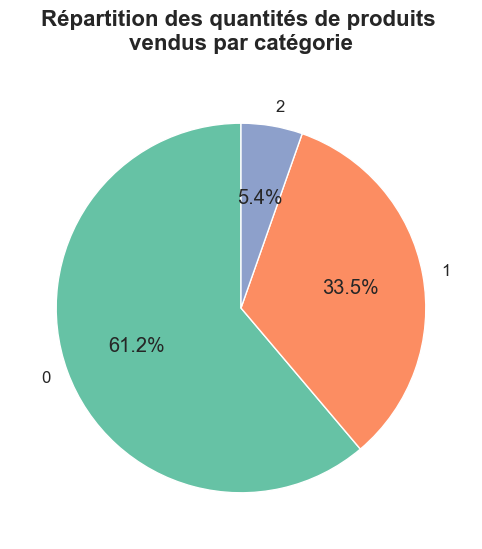

In [75]:
# Assurez-vous d'utiliser le même jeu de couleurs que pour le graphique de barres empilées
couleurs_categories = sns.color_palette("Set2", n_colors=3)  # 3 catégories ici : 0, 1, 2

# Dictionnaire pour associer chaque catégorie à sa couleur
couleurs_mapping = {
    '0': couleurs_categories[0],  # Couleur pour la catégorie 0
    '1': couleurs_categories[1],  # Couleur pour la catégorie 1
    '2': couleurs_categories[2],  # Couleur pour la catégorie 2
}

# Calculer la quantité totale de produits par catégorie
quantites_par_categorie = (
    df_final.groupby('category')['product_id']
    .count()
    .reset_index()
    .rename(columns={'product_id': 'Quantité totale de produits'})
)

# Générer la liste de couleurs en respectant l'ordre des catégories
couleurs_pie = [
    couleurs_mapping[str(cat)] 
    for cat in quantites_par_categorie['category']
]

# Créer le graphique en secteurs
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(
    quantites_par_categorie['Quantité totale de produits'], 
    labels=quantites_par_categorie['category'], 
    autopct='%1.1f%%',  # Afficher les pourcentages avec 1 décimale
    startangle=90,      # Faire démarrer le graphique à 90°
    colors=couleurs_pie,  # Utiliser les couleurs harmonisées
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}  # Moderniser le design
)

# Ajouter un titre
ax.set_title("Répartition des quantités de produits \nvendus par catégorie", fontsize=16, pad=20)

# Afficher le graphique
# plt.tight_layout()
plt.show()

del quantites_par_categorie, couleurs_pie

C'est également la catégorie '0' qui genère le plus grand nombre en quantité de produits vendus.

## 5.4. Analyses des transactions

In [76]:
# Grouper par année et compter les sessions uniques (transactions)
transactions_par_annee = (
    df_final.groupby('year')['session_id']
    .nunique()  # Compter les sessions uniques par année
    .reset_index()  # Rétablir un DataFrame
    .rename(columns={'year': 'Année', 'session_id': 'Nombre de transactions'})
)

# Calculer le total des transactions
total_transactions = transactions_par_annee['Nombre de transactions'].sum()

# Ajouter une ligne pour le total
transactions_par_annee = pd.concat(
    [
        transactions_par_annee,
        pd.DataFrame({'Année': ['Total'], 'Nombre de transactions': [total_transactions]})
    ],
    ignore_index=True
)

# Affichage du résultat
print(transactions_par_annee)

del transactions_par_annee, total_transactions

   Année  Nombre de transactions
0   2021                  139866
1   2022                  174581
2   2023                   27831
3  Total                  342278


Comme pour les autres analyses, j'affiche l'évolution mensuelle du nombre de transactions sur le site de vente en ligne.

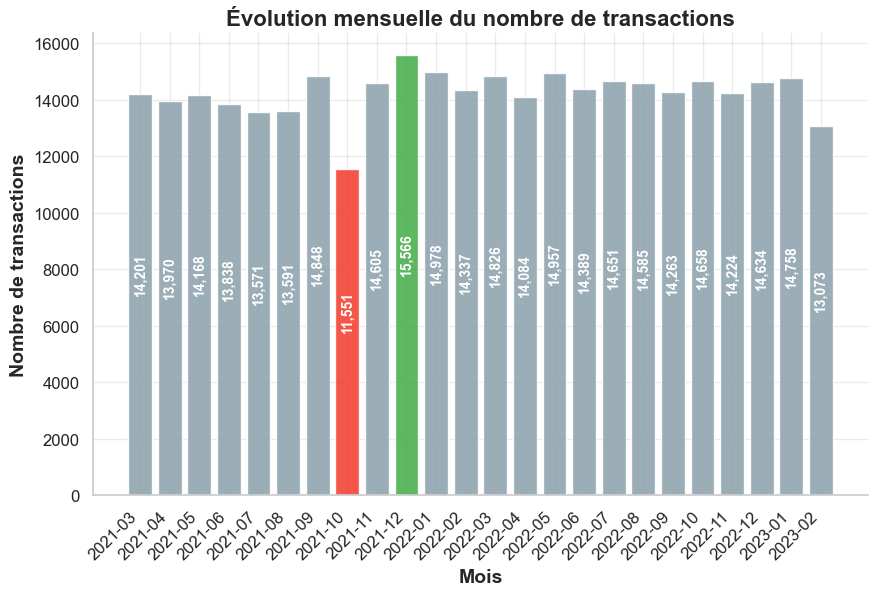

In [77]:
# Grouper par mois et compter les sessions uniques (transactions)
transactions_par_mois = (
    df_final.groupby('year_month')['session_id']
    .nunique()
    .reset_index()
    .rename(columns={'session_id': 'Nombre de transactions'})
)

# Identifier les mois avec le maximum et le minimum de transactions
max_transactions = transactions_par_mois['Nombre de transactions'].max()
min_transactions = transactions_par_mois['Nombre de transactions'].min()

# Créer une liste de couleurs en fonction des valeurs max et min
colors = [
    '#4CAF50' if x == max_transactions else
    '#F44336' if x == min_transactions else
    '#90A4AE'  # Couleur neutre
    for x in transactions_par_mois['Nombre de transactions']
]

# Configurer le style graphique
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(
    transactions_par_mois['year_month'].dt.strftime('%Y-%m'),  # Formatage des mois en texte
    transactions_par_mois['Nombre de transactions'],
    color=colors,
    alpha=0.9,  # Transparence légère
)

# Ajouter les valeurs à l'intérieur des barres (verticalement)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,  # Centrer verticalement dans la barre
        f'{int(bar.get_height()):,}',  # Format avec séparateur de milliers
        ha='center',
        va='bottom',
        rotation=90,
        fontsize=10,
        color='white',  # Texte en blanc pour contraste
        fontweight='bold'
    )

# Titre et labels
plt.title("Évolution mensuelle du nombre de transactions", fontweight='bold')
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45, ha='right')  # Rotation des labels de l'axe X

# Supprimer les bordures supérieures et droites pour un style moderne
sns.despine()

# Ajuster la mise en page et afficher
# plt.tight_layout()
plt.show()

del transactions_par_mois, max_transactions, min_transactions, colors, bars,

Le résultat 10/2021 provient sûrement de notre problème de remontée des données.  
Par contre, cette fois-ci c'est 12/2021 qui a généré le plus de transactions.

Je vais analyser le panier moyen par transaction sous la forme d'une graphique d'évolution mensuelle.

   year_month  Montant moyen par transaction
0  2021-03-01                      33.972298
1  2021-04-01                      34.080838
2  2021-05-01                      34.792735
3  2021-06-01                      34.982552
4  2021-07-01                      35.578469
5  2021-08-01                      35.485600
6  2021-09-01                      34.162223
7  2021-10-01                      27.772378
8  2021-11-01                      35.341851
9  2021-12-01                      33.786283
10 2022-01-01                      35.074041
11 2022-02-01                      37.355897
12 2022-03-01                      34.767067
13 2022-04-01                      35.004185
14 2022-05-01                      34.574621
15 2022-06-01                      34.471897
16 2022-07-01                      34.863362
17 2022-08-01                      34.725216
18 2022-09-01                      34.643100
19 2022-10-01                      34.651233
20 2022-11-01                      34.917389
21 2022-12

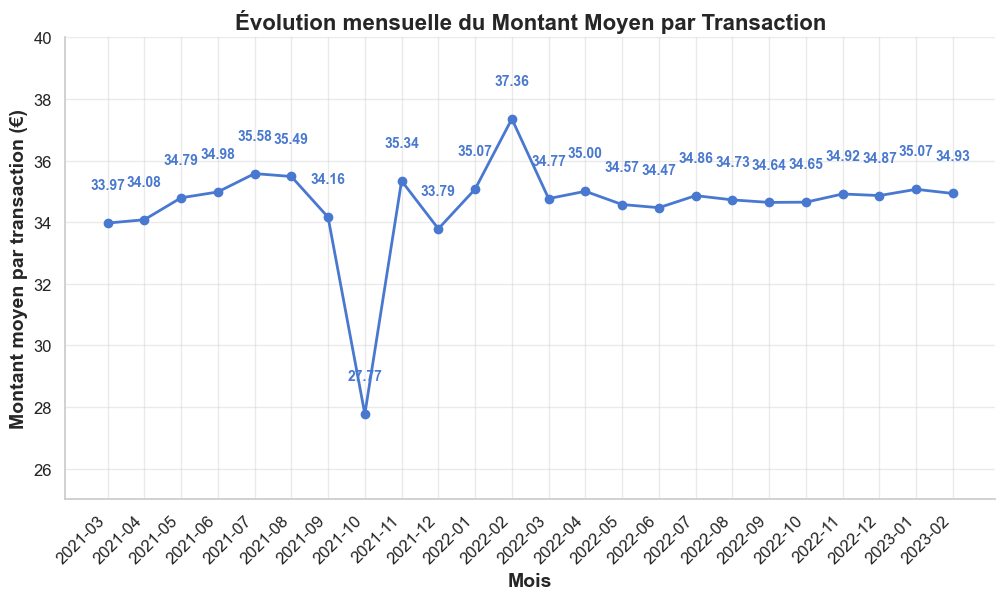

In [78]:
# Calculer le chiffre d'affaires total par mois
chiffre_affaires_par_mois = (
    df_final.groupby('year_month')['price']
    .sum()  # Somme des prix (chiffre d'affaires) par mois
    .reset_index()
    .rename(columns={'price': 'Chiffre d\'affaires total'})
)

# Grouper par mois et compter le nombre de transactions uniques
transactions_par_mois = (
    df_final.groupby('year_month')['session_id']
    .nunique()  # Compter les transactions uniques (sessions distinctes)
    .reset_index()
    .rename(columns={'session_id': 'Nombre de transactions'})
)

# Fusionner les deux DataFrames pour avoir le Chiffre d'Affaires et le Nombre de Transactions dans un seul DataFrame
montant_moyen_par_transaction = pd.merge(
    chiffre_affaires_par_mois, 
    transactions_par_mois, 
    on='year_month'
)

# Calculer le Montant Moyen par Transaction
montant_moyen_par_transaction['Montant moyen par transaction'] = (
    montant_moyen_par_transaction['Chiffre d\'affaires total'] / montant_moyen_par_transaction['Nombre de transactions']
)

# Afficher le résultat
print(montant_moyen_par_transaction[['year_month', 'Montant moyen par transaction']])

# Tracer un graphique pour visualiser l'évolution du montant moyen par transaction
plt.figure(figsize=(12, 6))
plt.plot(
    montant_moyen_par_transaction['year_month'].dt.strftime('%Y-%m'),
    montant_moyen_par_transaction['Montant moyen par transaction'],
    marker='o', color='b', linestyle='-', linewidth=2
)

# Ajouter les valeurs à chaque point du graphique (au-dessus du point)
for i, value in enumerate(montant_moyen_par_transaction['Montant moyen par transaction']):
    plt.text(
        i, value + 1,  # Positionner le texte un peu au-dessus du point, ajusté à 10 pour éviter la superposition
        f'{value:.2f}',  # Afficher le montant moyen formaté à 2 décimales
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='b'
    )

# Ajouter un titre et des labels
plt.title("Évolution mensuelle du Montant Moyen par Transaction", fontweight='bold')
plt.xlabel("Mois")
plt.ylabel("Montant moyen par transaction (€)")

# Rotation des labels de l'axe X
plt.xticks(rotation=45, ha='right')

# Ajuster les limites de l'axe Y
plt.ylim(25, 40)  # Placer la valeur min à 25 et la valeur max à 40

# Supprimer les bordures supérieures et droites pour un style moderne
sns.despine()

# Ajuster la mise en page et afficher
# plt.tight_layout()
plt.show()

del chiffre_affaires_par_mois, transactions_par_mois, montant_moyen_par_transaction

Je note une grande stabilité en 34 et 36 € le panier moyen par transaction.  
Nous avons 2 exceptions au cours des 24 mois, à savoir 10/2021 et 02/2022 à 37,36 € de panier moyen.

Pour la dernière analyse des transactions, nous allons voir si certains jours de la semaine et certaines heures de la journée sont plus propices aux transactions.  
Nous allons regrouper les transactions par jour et par heure dans un heatmap.  
Au préalable, il y a lieu de contrôler que chaque session soit dans la même heure.

In [79]:
# Trier df_final par 'session_id' en ordre croissant
df_final_sort = df_final.sort_values(by='session_id', ascending=True)

df_final_sort.head(50)

,session_id,date,product_id,category,price,client_id,gender,birth_year,Outlier,year,year_month,year_month_day
79032,s_1,2021-03-01 00:01:07.843138,0_1259,0,11.99,c_329,f,1967,False,2021,2021-03-01,2021-03-01
613171,s_10,2021-03-01 00:10:33.163037,1_635,1,26.99,c_2218,f,1970,False,2021,2021-03-01,2021-03-01
10876,s_100,2021-03-01 04:12:43.572994,0_1030,0,13.73,c_3854,f,1978,False,2021,2021-03-01,2021-03-01
198195,s_100,2021-03-01 04:43:58.025677,0_1451,0,19.99,c_3854,f,1978,False,2021,2021-03-01,2021-03-01
185157,s_1000,2021-03-03 03:25:12.320225,0_1438,0,9.31,c_1014,m,1989,False,2021,2021-03-01,2021-03-03
299178,s_1000,2021-03-03 02:38:09.568389,0_1625,0,5.99,c_1014,m,1989,False,2021,2021-03-01,2021-03-03
279430,s_1000,2021-03-03 02:49:03.169115,0_1590,0,18.93,c_1014,m,1989,False,2021,2021-03-01,2021-03-03
195744,s_1000,2021-03-03 03:18:58.492283,0_1449,0,4.99,c_1014,m,1989,False,2021,2021-03-01,2021-03-03
512032,s_10000,2021-03-22 17:46:05.819130,1_395,1,28.99,c_476,f,1989,False,2021,2021-03-01,2021-03-22
96442,s_10000,2021-03-22 17:58:20.634519,0_1324,0,3.93,c_476,f,1989,False,2021,2021-03-01,2021-03-22


Manifestement, chaque session peut avoir des heures différentes.  
Je considére donc la dernière heure de la session (timestamp) comme heure de référence pour mon heatmap.

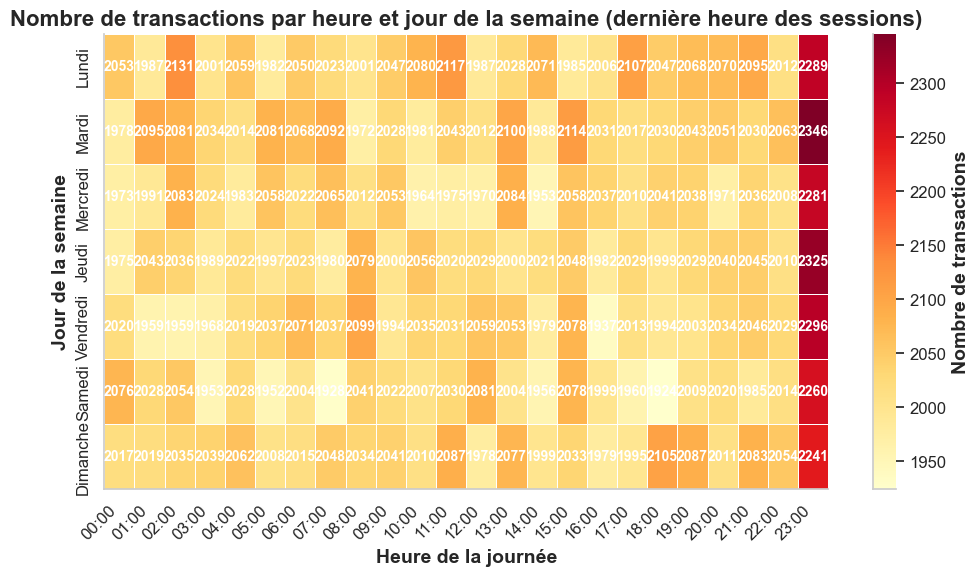

In [80]:
# Extraire le dernier timestamp par session
dernieres_sessions = (
    df_final.groupby('session_id')['date']
    .max()  # Dernier timestamp pour chaque session
    .reset_index()
    .rename(columns={'date': 'last_timestamp'})
)

# Ajouter le jour de la semaine et l'heure du dernier timestamp
dernieres_sessions['day_of_week'] = dernieres_sessions['last_timestamp'].dt.day_name()
dernieres_sessions['hour'] = dernieres_sessions['last_timestamp'].dt.hour

# Traduire les jours de la semaine en français
jours_semaine_fr = {
    'Monday': 'Lundi', 'Tuesday': 'Mardi', 'Wednesday': 'Mercredi', 'Thursday': 'Jeudi',
    'Friday': 'Vendredi', 'Saturday': 'Samedi', 'Sunday': 'Dimanche'
}
dernieres_sessions['day_of_week'] = dernieres_sessions['day_of_week'].map(jours_semaine_fr)

# Grouper par jour de la semaine et heure pour compter les sessions uniques
transactions_par_jour_heure = (
    dernieres_sessions.groupby(['day_of_week', 'hour'])
    .size()  # Compter les sessions
    .reset_index(name='Nombre de transactions')  # Renommer la colonne
)

# Réorganiser les jours de la semaine dans l'ordre correct
jours_semaine = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
transactions_par_jour_heure['day_of_week'] = pd.Categorical(
    transactions_par_jour_heure['day_of_week'], categories=jours_semaine, ordered=True
)

# Créer un pivot pour la heatmap
heatmap_data = transactions_par_jour_heure.pivot(index='day_of_week', columns='hour', values='Nombre de transactions')

# Configurer le style graphique selon le 'template graphique'
sns.set_style("whitegrid")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (10, 6)
})

# Créer la heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",  # Gradient de couleurs chaudes (jaune à rouge)
    annot=True,  # Ajouter les annotations des valeurs
    fmt="d",  # Format des annotations en entier
    cbar_kws={'label': 'Nombre de transactions'},  # Légende de la barre de couleur
    linewidths=0.5,  # Espacement des cellules
    linecolor='white',  # Couleur des lignes de séparation
    annot_kws={"size": 10, "weight": "bold", "color": "white"}  # Format du texte des annotations
)

# Ajuster les labels de l'axe X pour afficher l'heure au format hh:mm
ax.set_xticklabels([f"{i:02d}:00" for i in range(24)], rotation=45, ha='right')

# Ajouter un titre et des labels
plt.title("Nombre de transactions par heure et jour de la semaine (dernière heure des sessions)", fontweight='bold')
plt.xlabel("Heure de la journée")
plt.ylabel("Jour de la semaine")

# Supprimer les bordures supérieures et droites pour un style moderne
sns.despine()

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


Ce heatmap nous indique que c'est entre 23:00 et 00:00 le mardi que le plus de transactions a lieu.  
Néanmoins, nous ne pouvons pas en tirer beaucoup d'enseignement, sachant qu'à chaque heure de n'importe quel jour, des transactions ont lieu  
pour le même nombre approximativement.

# 6. Corrélations et comportements des clients

En préambule, tous les tests réalisés par la suite seront validés par un calcul de la p-value  

H0 (hypothèse nulle) : Si la p-value > 5% , cela suggère que les résultats observés sont compatibles avec l'hypothèse nulle. On ne rejette pas  
H0, donc il n'y a pas de preuve solide d'un effet ou d'une relation.  

H1 (hypothèse alternative) : Si la p-value < 5% , cela suggère que les résultats observés ne sont probablement pas dus au hasard. On rejette l'hypothèse nulle
H0 et on accepte H1, ce qui signifie qu'il y a probablement une relation ou un effet significatif.

Toutes nos analyses comportementales seront orientées Clients non professionnels

## 6.1. Corrélation entre le genre d'un client et les catégories des livres achetés

Nous sommes dans ce cas en présence de 2 variables qualitatives. Le genre des clients est composé de 2 groupes ('f' et 'm') et les catégories de 3 groupes ('0', '1' et '2').  
Je réalise tout d'abord un tableau de contingence des 2 variables qui me permettra de décider quel test d'hypothèses j'appliquerai.

In [81]:
# Créer un tableau croisé entre le genre et la catégorie pour calculer les fréquences d'achat hors clients professionnels
genre_categorie_counts = pd.crosstab(df_final.loc[~df_final['client_id'].isin(clients_pro)]['gender'], df_final.loc[~df_final['client_id'].isin(clients_pro)]['category'])

#J'affiche le tableau de contingence brut
genre_categorie_counts

category,0,1,2
gender,,,
f,200793,111331,16980
m,186488,101017,15868


Je constate que les fréquences sont >= 5, je vais donc m'orienter vers un test des hypothèses Chi-2 pour m'assurer que les  
éventuelles corrélations ne sont pas dues au hasard.
Pour une meilleure vision des éventuelles corrélations entre Le genre d'un client et Les catégories des livres achetés,  
j'affiche tout d'abord le tableau de contingence dans un histogramme et sous la forme d'un heatmap.

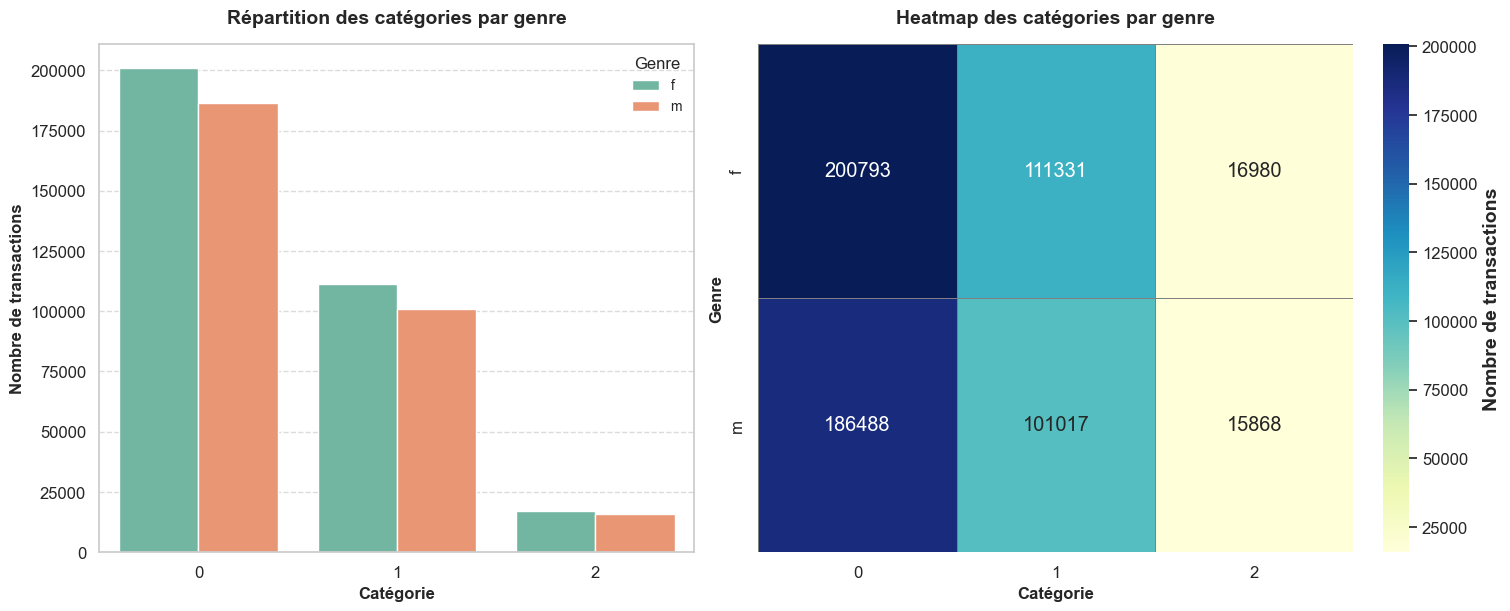

In [82]:
# Création des données pour les graphiques à partir de genre_categorie_counts
# Convertir le tableau croisé en DataFrame pour le barplot
genre_categorie_counts_reset = genre_categorie_counts.reset_index().melt(
    id_vars='gender', var_name='category', value_name='count'
)

# Création de la figure avec deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

# 1er graphique : Histogramme des catégories par genre
sns.barplot(
    data=genre_categorie_counts_reset,
    x='category', y='count', hue='gender',
    ax=axes[0], palette='Set2'
)
axes[0].set_title("Répartition des catégories par genre", fontsize=14, pad=15)
axes[0].set_xlabel("Catégorie", fontsize=12)
axes[0].set_ylabel("Nombre de transactions", fontsize=12)
axes[0].legend(title="Genre", fontsize=10, title_fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2e graphique : Heatmap des fréquences
sns.heatmap(
    genre_categorie_counts, annot=True, fmt='g', cmap='YlGnBu',
    linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Nombre de transactions'},
    ax=axes[1]
)
axes[1].set_title("Heatmap des catégories par genre", fontsize=14, pad=15)
axes[1].set_xlabel("Catégorie", fontsize=12)
axes[1].set_ylabel("Genre", fontsize=12)

# Afficher les graphiques
plt.show()


Je réalise maintenant le test des hypothèses Chi-2.

In [83]:
#HO : la catégorie de livres achetés est indépendante du genre du client
#H1 : la catégorie de livres achetés dépend du genre du client


from scipy.stats import chi2_contingency

# Appliquer le test du chi-carré sur la table de contingence
chi2, p, dof, expected = chi2_contingency(genre_categorie_counts)

# Afficher les résultats
print(f"Chi2-statistique: {chi2:.8f}")
print(f"Valeur p: {p:.8f}")
print(f"Degrés de liberté: {dof}")
print(f"Fréquences attendues :")
print(expected)

# Conclusion du test
alpha = 0.05  # Seuil de significativité
if p < alpha:
    print("H1 : la catégorie de livres achetés dépend du genre du client, \nil y a une corrélation")
else:
    print("HO : la catégorie de livres achetés est indépendante du genre du client, \nil n'y a pas de corrélation")


Chi2-statistique: 20.21346069
Valeur p: 0.00004080
Degrés de liberté: 2
Fréquences attendues :
[[201518.35754344 110493.46646914  17092.17598743]
 [185762.64245656 101854.53353086  15755.82401257]]
H1 : la catégorie de livres achetés dépend du genre du client, 
il y a une corrélation


## 6.2. Corrélation entre l'âge des clients et diverses variables

Nous analysons maintenant la variable 'Âge des clients' avec différentes autres variables :  
1. Le montant total des achats  
2. La fréquence d'achat  
3. La taille du panier moyen  
  
Nous comparons donc à chaque fois, 2 variables quantitatives.  
  
Pour commencer, je réalise un tableau de contingence des différentes variables.

In [84]:
# Filtrer les clients non professionnels
df_non_pro = df_final[~df_final['client_id'].isin(clients_pro)]

# Calcul des indicateurs pour les clients non professionnels
table_corr_non_pro = df_non_pro.groupby('client_id', as_index=False).agg(
    age=('birth_year', lambda x: 2024 - x.mean()),  # Age moyen (année actuelle : 2024)
    montant_total_achats=('price', 'sum'),                 # Montant total des achats
    frequence_achat=('session_id', 'nunique'), # Fréquence d'achat (nombre de sessions uniques)
    taille_panier_moyen=('price', 'mean')             # Taille moyenne du panier
)

# Afficher la table pour les corrélations
print(table_corr_non_pro.head())


  client_id   age  montant_total_achats  frequence_achat  taille_panier_moyen
0       c_1  69.0                558.18               33            14.312308
1      c_10  68.0               1353.60               34            23.337931
2     c_100  32.0                254.85                5            31.856250
3    c_1000  58.0               2261.89               93            18.095120
4    c_1001  42.0               1812.86               47            17.773137


J'affiche maintenant un heatmap de corrélation du tableau de contingence des différentes variables.

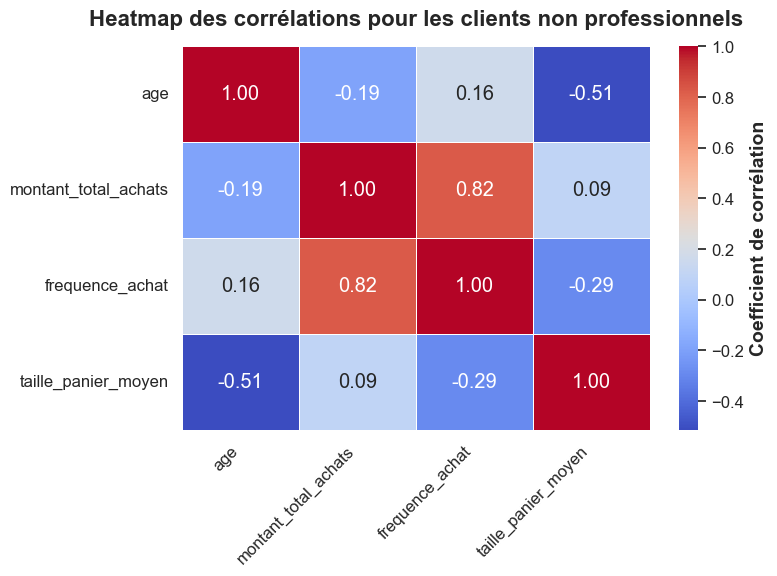

In [85]:
# Sélection des variables pour les clients non professionnels
variables_corr = table_corr_non_pro[[
    'age', 'montant_total_achats', 'frequence_achat', 'taille_panier_moyen'
]]

# Calcul des corrélations
correlation_matrix = variables_corr.corr()

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5,
    cbar_kws={'label': 'Coefficient de corrélation'}
)
plt.title("Heatmap des corrélations pour les clients non professionnels", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Affichage de la heatmap
plt.show()


Je remarque que l'âge semble corrélé avec chaque variable; plus particulièrement avec la taille du panier moyen (plus l'âge augmente, plus la taille du panier moyen diminue).

Je continue mes investigations et décide d'afficher les diagrammes de dispersion de chaque variable ainsi que leur distribution (avec la courbe gaussienne).

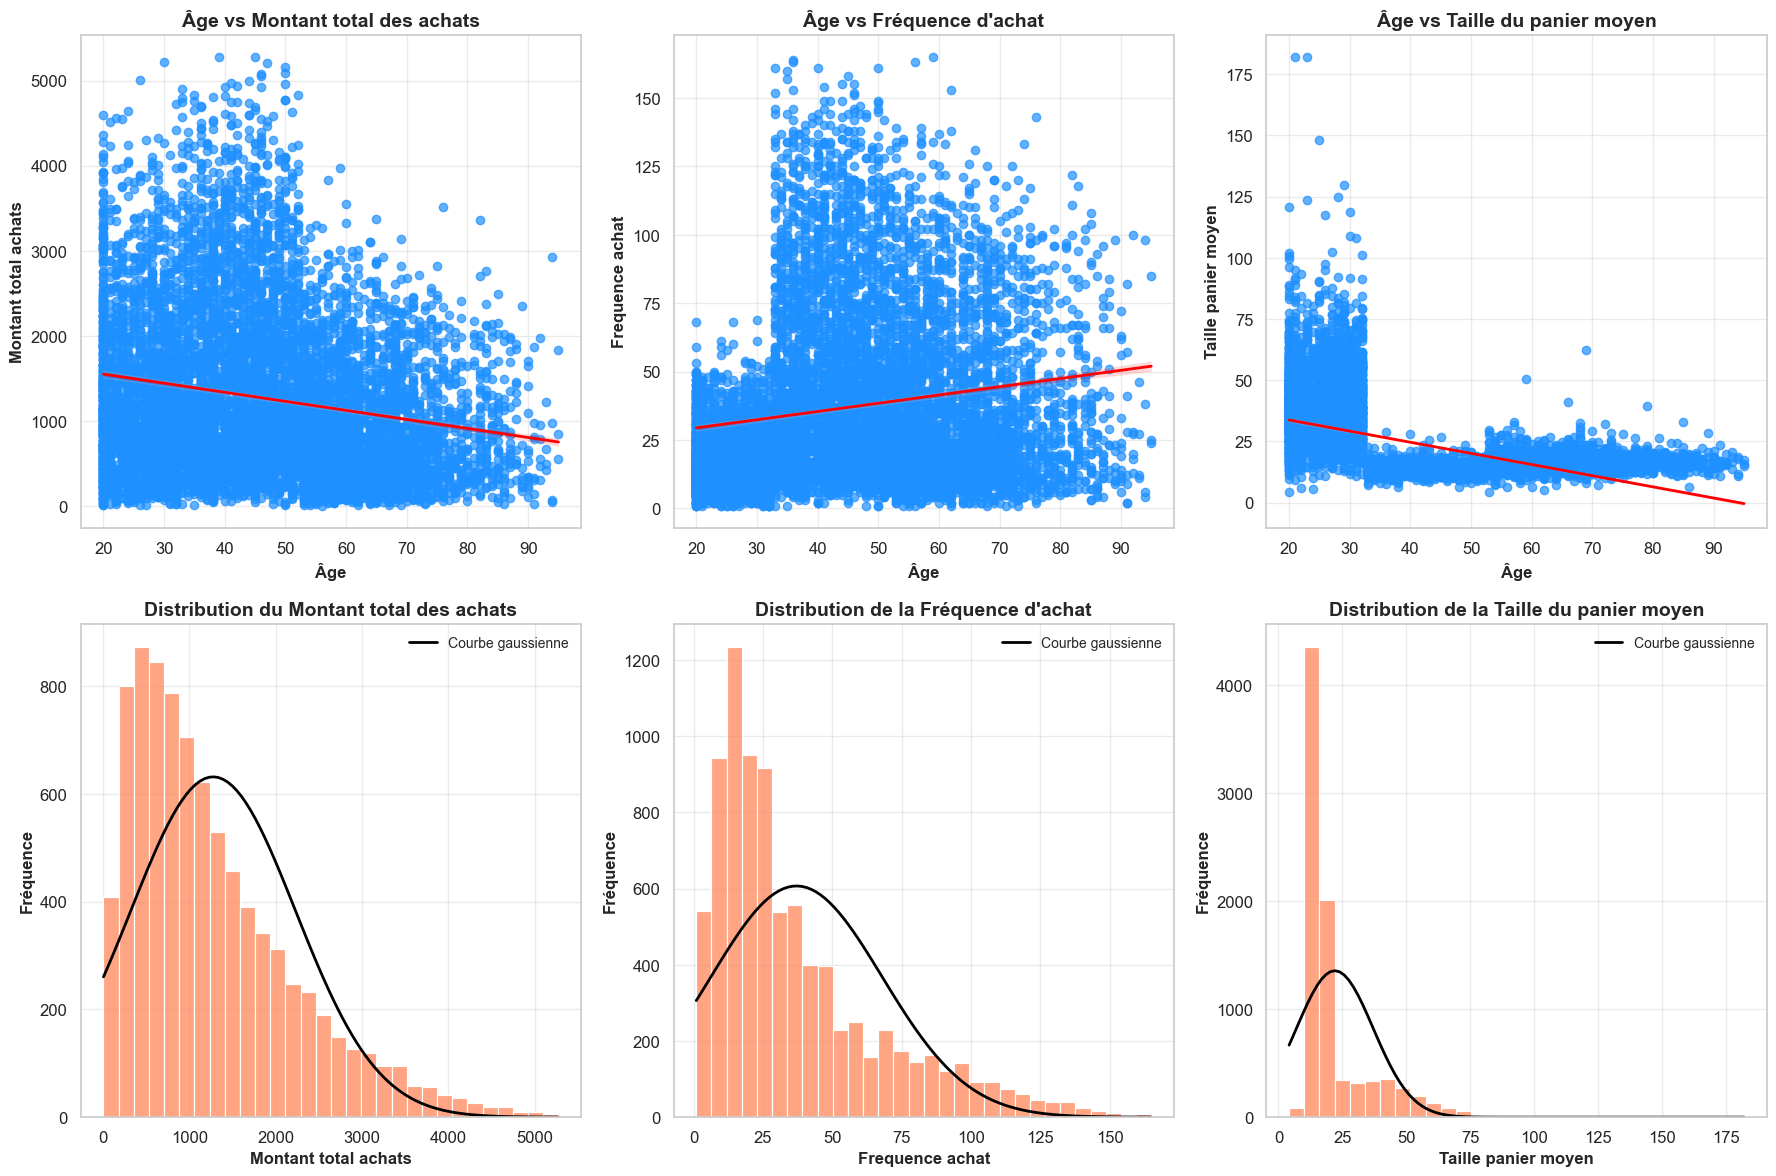

In [86]:
from scipy.stats import norm

# Définir les variables pour les scatterplots
variables_scatter = ['montant_total_achats', 'frequence_achat', 'taille_panier_moyen']
titles_scatter = [
    "Âge vs Montant total des achats",
    "Âge vs Fréquence d'achat",
    "Âge vs Taille du panier moyen"
]

# Définir les variables pour les distributions
variables_distribution = ['montant_total_achats', 'frequence_achat', 'taille_panier_moyen']
titles_distribution = [
    "Distribution du Montant total des achats",
    "Distribution de la Fréquence d'achat",
    "Distribution de la Taille du panier moyen"
]

# Créer une figure avec 2 lignes et 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajuster l'espacement

# Première ligne : Scatterplots avec sns.regplot
for i, variable in enumerate(variables_scatter):
    sns.regplot(
        x='age', 
        y=variable, 
        data=table_corr_non_pro, 
        ax=axes[0, i], 
        scatter_kws={'color': "dodgerblue", 'alpha': 0.7},  # Points
        line_kws={'color': "red", 'linewidth': 2}  # Ligne de tendance
    )
    axes[0, i].set_title(titles_scatter[i], fontsize=14)
    axes[0, i].set_xlabel("Âge", fontsize=12)
    axes[0, i].set_ylabel(variable.replace('_', ' ').capitalize(), fontsize=12)

# Deuxième ligne : Distributions avec courbes gaussiennes
for i, variable in enumerate(variables_distribution):
    # Histogramme
    sns.histplot(
        table_corr_non_pro[variable], 
        ax=axes[1, i], 
        bins=30, 
        kde=False, 
        color="coral", 
        alpha=0.7
    )
    
    # Calcul des paramètres de la courbe gaussienne
    data = table_corr_non_pro[variable].dropna()  # Supprimer les valeurs manquantes
    mean, std = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)  # Points pour la courbe
    y = norm.pdf(x, mean, std) * len(data) * (data.max() - data.min()) / 30  # Ajuster à l'échelle de l'histogramme

    # Ajouter la courbe gaussienne
    axes[1, i].plot(x, y, color='black', linewidth=2, label='Courbe gaussienne')
    
    # Titres et labels
    axes[1, i].set_title(titles_distribution[i], fontsize=14)
    axes[1, i].set_xlabel(variable.replace('_', ' ').capitalize(), fontsize=12)
    axes[1, i].set_ylabel("Fréquence", fontsize=12)
    axes[1, i].legend(fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


Je remarque une tendance à la baisse du montant des achats en fonction de l'âge des clients : plus l'âge augmente plus le montant diminue.  
Je remarque également qu'à compter d'environ 32 ans, les fréquences d'achat augmentent considérablement.  
C'est également à partir cet âge, que j'observe en forte diminution de la taille du panier moyen.  

Pour le graphique de distribution, je constate qu'ils ne répondent pas à la loi normale.  
Je vais encore réaliser un test pour confirmer cela. Je choisis le test de Kolmogorov-Smirnov pour les raisons suivantes :  
- notre échantillon > 2000 observations vs test de Shapiro-Wilk pour des échantillons < 2000 observations

In [87]:
from scipy.stats import kstest, norm

# Liste des variables à tester
variables = ['montant_total_achats', 'frequence_achat', 'taille_panier_moyen']

# Dictionnaire pour stocker les résultats
results = {}

# Tester chaque variable
for var in variables:
    # Retirer les valeurs manquantes
    data = table_corr_non_pro[var].dropna()

    # Calculer la moyenne et l'écart-type de la variable
    mean, std = data.mean(), data.std()

    # Effectuer le test de Kolmogorov-Smirnov en comparant les données à une distribution normale
    ks_stat, p_value = kstest(data, 'norm', args=(mean, std))

    # Enregistrer les résultats
    results[var] = {'ks_stat': ks_stat, 'p_value': p_value}

# Afficher les résultats
print("Résultats du test de Kolmogorov-Smirnov :")
for var, res in results.items():
    print(f"Variable : {var}")
    print(f"  - Statistique KS : {res['ks_stat']:.4f}")
    print(f"  - p-valeur : {res['p_value']:.4e}")
    if res['p_value'] < 0.05:
        print("  -> La distribution n'est PAS normale (rejette l'hypothèse nulle).")
    else:
        print("  -> La distribution est normale (ne rejette pas l'hypothèse nulle).")


Résultats du test de Kolmogorov-Smirnov :
Variable : montant_total_achats
  - Statistique KS : 0.1064
  - p-valeur : 3.0398e-85
  -> La distribution n'est PAS normale (rejette l'hypothèse nulle).
Variable : frequence_achat
  - Statistique KS : 0.1528
  - p-valeur : 1.3515e-175
  -> La distribution n'est PAS normale (rejette l'hypothèse nulle).
Variable : taille_panier_moyen
  - Statistique KS : 0.2782
  - p-valeur : 0.0000e+00
  -> La distribution n'est PAS normale (rejette l'hypothèse nulle).


Le test de Kolmogorov-Smirnov me confirme que les distributions de chaque variable ne sont pas normales.  
Pour valider s'il existe bel et bien des corrélations entre chaque variable, je décide donc d'exécuter le test de Spearman.  
En effet :  
1. Les variables sont quantitatives  
2. Les variables sont indépendantes  
3. Les données n'ont pas besoin de suivre une loi normale  
4. La relation entre les variables n'a pas besoin d'être linéaire  
  
Voici déjà le résultat du test sous forme de tableau :  

In [88]:
from scipy.stats import spearmanr

# Initialiser un DataFrame pour stocker les résultats
results = []

# Liste des variables pour les tests
variables = ['montant_total_achats', 'frequence_achat', 'taille_panier_moyen']

# Effectuer les tests de Spearman
for variable in variables:
    correlation, p_value = spearmanr(table_corr_non_pro['age'], table_corr_non_pro[variable])
    results.append({
        'Variable': variable,
        'Correlation': correlation,
        'P-value': p_value,
        'Significatif': 'Oui' if p_value < 0.05 else 'Non'
    })

# Convertir les résultats en DataFrame pour une lecture plus facile
results_df = pd.DataFrame(results)

# Afficher les résultats
print("Résultats du test de Spearman :")
print(results_df)


Résultats du test de Spearman :
               Variable  Correlation        P-value Significatif
0  montant_total_achats    -0.185139   3.788575e-67          Oui
1       frequence_achat     0.212297   3.504908e-88          Oui
2   taille_panier_moyen    -0.326166  3.280394e-212          Oui


et par variables

## 6.2.1. Corrélation entre l'âge des clients et le montant total des achats

In [89]:
# Retirer les valeurs manquantes pour 'age' et 'montant_total_achats'
data = table_corr_non_pro[['age', 'montant_total_achats']].dropna()

# Vérifier si les données sont suffisantes pour effectuer le test
if len(data) < 3:  # Spearman nécessite au moins 3 paires de valeurs
    print("Données insuffisantes pour effectuer le test de Spearman.")
else:
    # Calculer le coefficient de corrélation de Spearman et la p-valeur
    corr, p_value = spearmanr(data['age'], data['montant_total_achats'])

    # Afficher les résultats
    print("--- Test de Spearman pour 'montant_total_achats' ---")
    print(f"Coefficient de corrélation (rho) : {corr:.4f}")
    print(f"p-valeur : {p_value:.4e}")
    
    # Interprétation des résultats
    if p_value < 0.05:
        print("Résultat : La corrélation est significative (H1 : lien non dû au hasard).")
    else:
        print("Résultat : La corrélation n'est PAS significative (H0 : pas de lien détecté).")


--- Test de Spearman pour 'montant_total_achats' ---
Coefficient de corrélation (rho) : -0.1851
p-valeur : 3.7886e-67
Résultat : La corrélation est significative (H1 : lien non dû au hasard).


## 6.2.2. Corrélation entre l'âge des clients et la fréquence d'achat

In [90]:
# Retirer les valeurs manquantes pour 'age' et 'frequence_achat'
data = table_corr_non_pro[['age', 'frequence_achat']].dropna()

# Vérifier si les données sont suffisantes pour effectuer le test
if len(data) < 3:  # Spearman nécessite au moins 3 paires de valeurs
    print("Données insuffisantes pour effectuer le test de Spearman.")
else:
    # Calculer le coefficient de corrélation de Spearman et la p-valeur
    corr, p_value = spearmanr(data['age'], data['frequence_achat'])

    # Afficher les résultats
    print("--- Test de Spearman pour 'frequence_achat' ---")
    print(f"Coefficient de corrélation (rho) : {corr:.4f}")
    print(f"p-valeur : {p_value:.4e}")
    
    # Interprétation des résultats
    if p_value < 0.05:
        print("Résultat : La corrélation est significative (H1 : lien non dû au hasard).")
    else:
        print("Résultat : La corrélation n'est PAS significative (H0 : pas de lien détecté).")


--- Test de Spearman pour 'frequence_achat' ---
Coefficient de corrélation (rho) : 0.2123
p-valeur : 3.5049e-88
Résultat : La corrélation est significative (H1 : lien non dû au hasard).


## 6.2.3. Corrélation entre l'âge des clients et la taille du panier moyen

In [91]:
# Retirer les valeurs manquantes pour 'age' et 'taille_panier_moyen'
data = table_corr_non_pro[['age', 'taille_panier_moyen']].dropna()

# Vérifier si les données sont suffisantes pour effectuer le test
if len(data) < 3:  # Spearman nécessite au moins 3 paires de valeurs
    print("Données insuffisantes pour effectuer le test de Spearman.")
else:
    # Calculer le coefficient de corrélation de Spearman et la p-valeur
    corr, p_value = spearmanr(data['age'], data['taille_panier_moyen'])

    # Afficher les résultats
    print("--- Test de Spearman pour 'taille_panier_moyen' ---")
    print(f"Coefficient de corrélation (rho) : {corr:.4f}")
    print(f"p-valeur : {p_value:.4e}")
    
    # Interprétation des résultats
    if p_value < 0.05:
        print("Résultat : La corrélation est significative (H1 : lien non dû au hasard).")
    else:
        print("Résultat : La corrélation n'est PAS significative (H0 : pas de lien détecté).")


--- Test de Spearman pour 'taille_panier_moyen' ---
Coefficient de corrélation (rho) : -0.3262
p-valeur : 3.2804e-212
Résultat : La corrélation est significative (H1 : lien non dû au hasard).


## 6.3. Corrélation entre l'âge des clients et les catégories des livres achetés

Il s'agit de contrôler si l'âge des clients varie en fonction de la catégorie des livres achetés.  
Nous allons comparer 1 variable quantitative (âge) et 1 variable qualitative (catégorie).  
Pour sélectionner le test à appliquer, nous savons déjà que :  
* les variables sont indépendantes (c'est à dire que les données d'une variable ne dépendent pas des données de l'autre variable)  

Nous devons savoir encore si les âges suivent une distribution normale et si les variances des groupes sont égales.

Je commence par préparer la table de correspondance entre les 2 variables

In [92]:
df_final

,session_id,date,product_id,category,price,client_id,gender,birth_year,Outlier,year,year_month,year_month_day
0,s_908,2021-03-02 21:57:33.862118,0_0,0,3.75,c_1004,m,1973,False,2021,2021-03-01,2021-03-02
1,s_180968,2022-03-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999,False,2022,2022-03-01,2022-03-18
2,s_167174,2022-02-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999,False,2022,2022-02-01,2022-02-18
3,s_195932,2022-04-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999,False,2022,2022-04-01,2022-04-18
4,s_343439,2023-02-18 16:40:10.068303,0_0,0,3.75,c_1011,f,1999,False,2023,2023-02-01,2023-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...
679106,s_241374,2022-07-21 01:53:46.967570,2_99,2,84.99,c_5828,f,1998,False,2022,2022-07-01,2022-07-21
679107,s_329932,2023-01-21 01:53:46.967570,2_99,2,84.99,c_5828,f,1998,False,2023,2023-01-01,2023-01-21
679108,s_296127,2022-11-11 20:56:49.820935,2_99,2,84.99,c_7135,m,1996,False,2022,2022-11-01,2022-11-11
679109,s_310606,2022-12-11 20:56:49.820935,2_99,2,84.99,c_7135,m,1996,False,2022,2022-12-01,2022-12-11


In [93]:
# Calculer l'âge à partir de l'année de naissance
current_year = 2024
df_final['age'] = current_year - df_final['birth_year']


# Créer la table de correspondance
table_correspondance = df_final.groupby('category')['age'].apply(list).reset_index()

# Afficher la table
print(table_correspondance)


  category                                                age
0        0  [51, 25, 25, 25, 25, 49, 49, 49, 63, 63, 63, 6...
1        1  [44, 44, 46, 46, 46, 32, 71, 71, 71, 71, 61, 6...
2        2  [25, 25, 24, 44, 25, 25, 30, 30, 30, 20, 20, 2...


Je vais contrôler que les âges par catégorie suivent une distribution normale. Je décide d'afficher les graphiques de distribution,  
et je validerai par la suite par un test statistique.

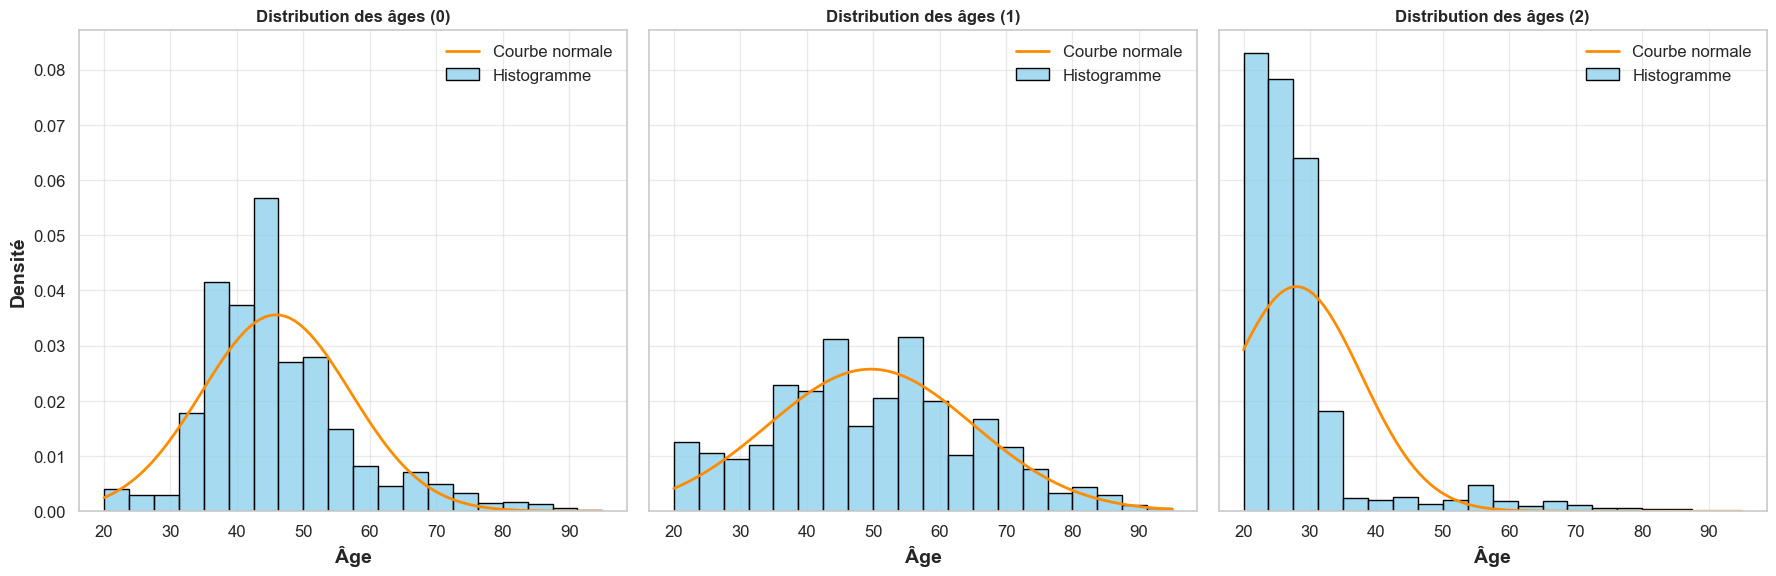

In [94]:
from scipy.stats import norm

# Préparer les catégories uniques
categories = table_correspondance['category'].unique()

# Créer une figure avec des sous-graphiques pour chaque catégorie
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6), sharey=True)

# Boucle pour chaque catégorie
for i, category in enumerate(categories):
    # Extraire les âges pour la catégorie en cours
    category_data = table_correspondance[table_correspondance['category'] == category]['age'].iloc[0]  # Extraire la liste des âges
    
    # Tracer l'histogramme et la densité
    sns.histplot(category_data, bins=20, kde=False, stat="density", color="skyblue", ax=axes[i], edgecolor="black", label="Histogramme")
    
    # Calculer les paramètres pour la courbe normale
    mean = np.mean(category_data)
    std = np.std(category_data)
    x = np.linspace(min(category_data), max(category_data), 100)
    pdf = norm.pdf(x, mean, std)
    
    # Ajouter la courbe normale
    axes[i].plot(x, pdf, color="darkorange", lw=2, label="Courbe normale")
    
    # Configurer le titre et les axes
    axes[i].set_title(f"Distribution des âges ({category})", fontsize=12)
    axes[i].set_xlabel("Âge")
    if i == 0:  # Afficher le label de l'axe Y uniquement pour le premier subplot
        axes[i].set_ylabel("Densité")
    else:
        axes[i].set_ylabel("")
    axes[i].legend()

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout()
plt.show()


Je réalise le test de Kolmogorov-Smirnov pour contrôler la normalité de la distribution par catégorie.

In [95]:
from scipy.stats import kstest, norm

# HO = La distribution pourrait être normale
# H1 = La distribution n'est pas normale

# Créer un dictionnaire pour stocker les résultats
ks_results = []

# Boucle sur chaque catégorie
for category in table_correspondance['category'].unique():
    # Filtrer les données pour la catégorie
    category_data = table_correspondance[table_correspondance['category'] == category]['age'].iloc[0]  # Extraire la liste d'âges
    
    # Aplatir la liste d'âges (si ce n'est pas déjà une série)
    if isinstance(category_data, list):
        ages = category_data
    else:
        ages = [category_data]
    
    # Calculer la moyenne et l'écart type des âges
    mean = sum(ages) / len(ages)  # Moyenne
    std = (sum((x - mean) ** 2 for x in ages) / len(ages)) ** 0.5  # Écart type
    
    # Effectuer le test de Kolmogorov-Smirnov
    stat, p_value = kstest(ages, 'norm', args=(mean, std))
    
    # Stocker les résultats
    ks_results.append({
        'Category': category,
        'KS Statistic': stat,
        'p-value': p_value
    })

# Convertir les résultats en dataframe pour un affichage clair
ks_results_df = pd.DataFrame(ks_results)

# Ajouter une interprétation du p-value
ks_results_df['Normality'] = ks_results_df['p-value'].apply(lambda p: 'Accept H0 (Normal)' if p > 0.05 else 'Reject H0 (Non-Normal)')

# Afficher les résultats
print("Résultats du test de Kolmogorov-Smirnov :")
print(ks_results_df)


Résultats du test de Kolmogorov-Smirnov :
  Category  KS Statistic  p-value               Normality
0        0      0.110027      0.0  Reject H0 (Non-Normal)
1        1      0.044560      0.0  Reject H0 (Non-Normal)
2        2      0.249121      0.0  Reject H0 (Non-Normal)


Manifestement, la distribution des âges pour chaque catégorie n'est pas normale.

Pour la suite, je contrôle l'égalité des variances entre chaque catégorie.  
Je commence par afficher les boxplots des âges par catégorie et je validerai par un test statistique.

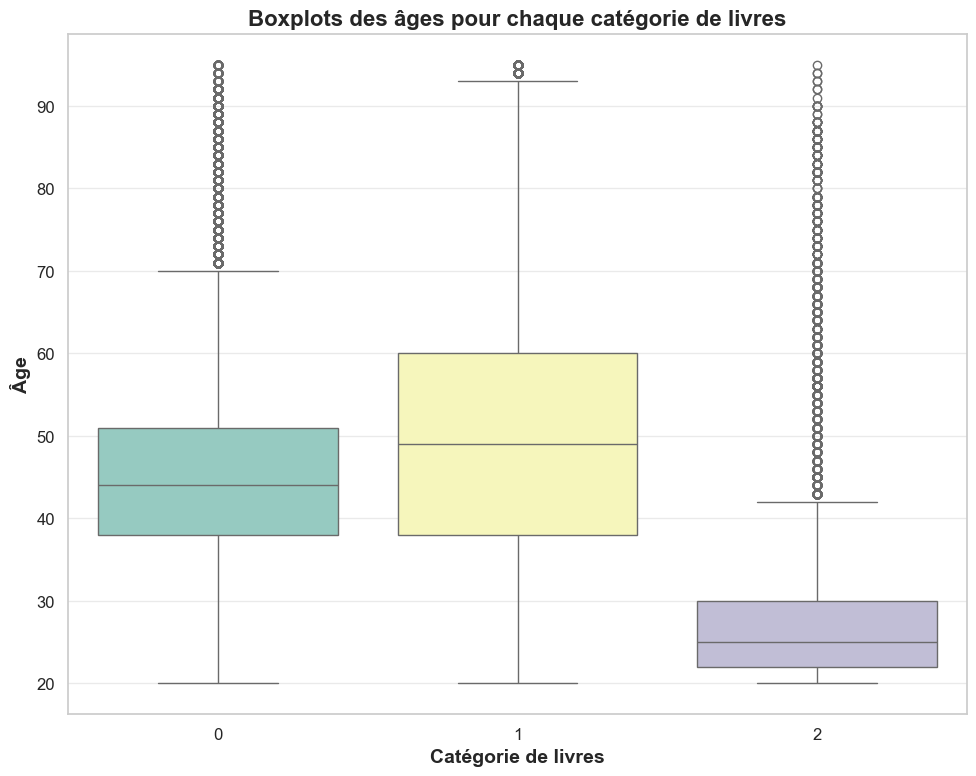

In [96]:
# Aplatir la colonne 'age' contenant des listes
table_correspondance_aplatie = table_correspondance.explode('age')

# Créer une figure pour les boxplots
plt.figure(figsize=(10, 8))

# Afficher les boxplots des âges par catégorie
sns.boxplot(
    x='category', 
    y='age', 
    data=table_correspondance_aplatie,  # Utilisation du dataframe des clients non professionnels
    palette="Set3",   # Palette de couleurs pour une meilleure lisibilité
    hue='category',  # Utiliser 'category' comme hue
    dodge=False       # Désactiver la séparation par hue
)

# Titre et labels
plt.title("Boxplots des âges pour chaque catégorie de livres", fontsize=16)
plt.xlabel("Catégorie de livres", fontsize=14)
plt.ylabel("Âge", fontsize=14)

# Afficher le graphique
plt.tight_layout()
plt.show()


A la lecture des boxplots, je remarque que les variances ne semblent pas égales.  
Je réalise le test statistique LEVENE qui confirmera cela.

In [97]:
# H0 = Les variances sont égales
# H1 = Les variances ne sont pas égales

# Réaliser le test de Levene pour tester l'égalité des variances
# Sélectionner les données d'âge pour chaque catégorie
groupes = [table_correspondance_aplatie[table_correspondance_aplatie['category'] == category]['age'] for category in table_correspondance_aplatie['category'].unique()]

# Effectuer le test de Levene
stat, p_value = stats.levene(*groupes)

# Afficher les résultats
print(f"Statistique de Levene : {stat:.3f}")
print(f"Valeur p : {p_value:.3f}")

# Interprétation du test
alpha = 0.05
if p_value < alpha:
    print("Les variances ne sont pas égales (rejeter l'hypothèse nulle).")
else:
    print("Les variances sont égales (accepter l'hypothèse nulle).")


Statistique de Levene : 26085.920
Valeur p : 0.000
Les variances ne sont pas égales (rejeter l'hypothèse nulle).


Nous savons maintenant que :  
* Les variables sont indépendantes
* Elles ne respectent pas une distribution normale  
* Les variances ne sont pas égales  

Compte tenu de ce constat, je vais réaliser le test statistique de Kruskal-Wallis pour savoir si l'âge des clients varie en fonction de la catégorie des livres achetés.  
En effet, les conditions pour le test statistique ANOVA ne sont pas remplies. 

In [98]:
# H0 = Il n'y a pas de différence significative des âges entre les catégories
# H1 = Les âges varient en fonction de la catégorie des livres

# Créer une liste de groupes pour le test (âges par catégorie)
groupes = [table_correspondance_aplatie[table_correspondance_aplatie['category'] == category]['age'] for category in table_correspondance_aplatie['category'].unique()]

# Réaliser le test de Kruskal-Wallis
stat, p_value = stats.kruskal(*groupes)

# Afficher les résultats
print(f"Statistique de Kruskal-Wallis : {stat:.3f}")
print(f"Valeur p : {p_value:.3f}")

# Interprétation du test
alpha = 0.05
if p_value < alpha:
    print("Les âges varient en fonction de la catégorie des livres \n(rejeter l'hypothèse nulle).")
else:
    print("Il n'y a pas de différence significative des âges entre les catégories \n(accepter l'hypothèse nulle).")


Statistique de Kruskal-Wallis : 79346.099
Valeur p : 0.000
Les âges varient en fonction de la catégorie des livres 
(rejeter l'hypothèse nulle).


Je réalise encore le test statistique ANOVA pour savoir si son résultat diffère.

In [99]:
# H0 = Il n'y a pas de différence significative des âges entre les catégories
# H1 = Les âges varient en fonction de la catégorie des livres

# Créer une liste de groupes pour l'ANOVA (âges par catégorie)
groupes = [table_correspondance_aplatie[table_correspondance_aplatie['category'] == category]['age'].dropna() for category in table_correspondance_aplatie['category'].unique()]

# Réaliser l'ANOVA classique
stat, p_value = stats.f_oneway(*groupes)

# Afficher les résultats
print(f"Statistique ANOVA : {stat:.3f}")
print(f"Valeur p : {p_value:.3f}")

# Interprétation du test
alpha = 0.05
if p_value < alpha:
    print("Les âges varient en fonction de la catégorie des livres \n(rejeter l'hypothèse nulle).")
else:
    print("Il n'y a pas de différence significative des âges entre les catégories \n(accepter l'hypothèse nulle).")


Statistique ANOVA : 45879.682
Valeur p : 0.000
Les âges varient en fonction de la catégorie des livres 
(rejeter l'hypothèse nulle).


# 7. Proposition d'analyses complémentaires

## 7.1. Segmentation des clients basés sur le comportement d'achat

- But : Identifier des groupes de clients avec des comportements similaires.  
- Résultat attendu : Identifier des profils de clients comme gros acheteurs fréquents, acheteurs occasionnels, etc.

## 7.2. Analyse de la fidélité des clients

- But : Étudier si les clients reviennent souvent et pour quelles catégories.  
- Résultat attendu : Identifier les catégories qui favorisent la fidélité.

In [100]:
# Filtrer les clients non professionnels
data_non_pro = df_final[~df_final['client_id'].isin(clients_pro)].copy()


In [101]:
data_non_pro['date'] = pd.to_datetime(data_non_pro['date'])


In [102]:
# Compter le nombre d'achats par client
achats_par_client = data_non_pro.groupby('client_id')['date'].count()


In [103]:
# Ajouter une colonne achat_repeté
data_non_pro['achat_repeté'] = data_non_pro['client_id'].isin(achats_par_client[achats_par_client > 1].index)


In [104]:
# Calculer le pourcentage de clients ayant effectué des achats répétés
total_clients = data_non_pro['client_id'].nunique()
clients_fidèles = data_non_pro[data_non_pro['achat_repeté']]['client_id'].nunique()
client_retention_rate = (clients_fidèles / total_clients) * 100
print(f"Taux de fidélité : {client_retention_rate:.2f}%")


Taux de fidélité : 99.91%


In [105]:
# Filtrer les achats répétés
achats_repetes = data_non_pro[data_non_pro['achat_repeté']]


In [106]:
# Analyser la répartition des catégories
repartition_categories = achats_repetes['category'].value_counts(normalize=True) * 100
print(repartition_categories)


category
0    61.232883
1    33.573503
2     5.193614
Name: proportion, dtype: float64


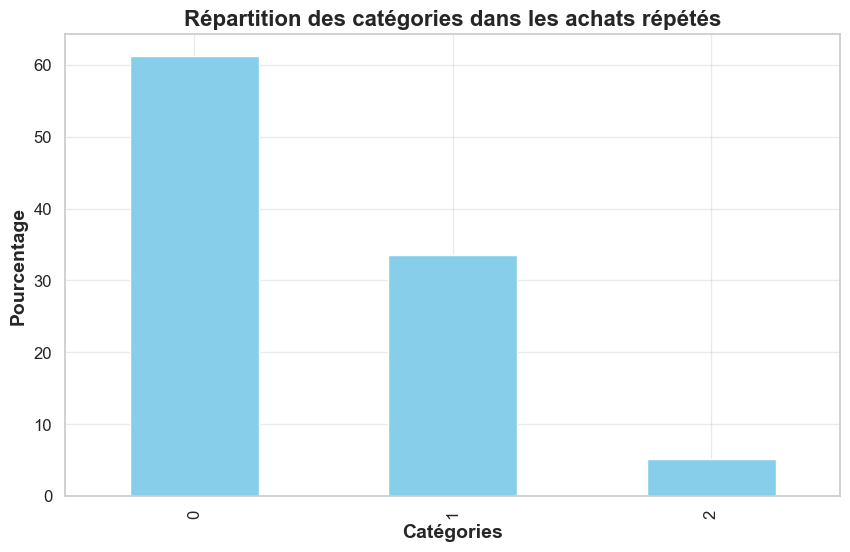

In [107]:
import matplotlib.pyplot as plt

# Répartition des catégories
repartition_categories.plot(kind='bar', color='skyblue')
plt.title('Répartition des catégories dans les achats répétés')
plt.ylabel('Pourcentage')
plt.xlabel('Catégories')
plt.show()


## 7.3. Prévisions des ventes (modélisation prédictive)

- But : Prévoir les ventes futures en fonction des tendances passées.  
- Résultat attendu : Identifier les périodes potentielles de forte demande.

## 7.4. Identification des clients à haut potentiel

-  But : Détecter les clients les plus susceptibles de générer des revenus élevés.
-  Résultat attendu : Cibler les clients à fort potentiel pour des campagnes marketing.

In [108]:
# Filtrer les clients non professionnels
data_non_pro = df_final[~df_final['client_id'].isin(clients_pro)].copy()

montant_total_achats = data_non_pro.groupby('client_id')['price'].sum().reset_index()
montant_total_achats.rename(columns={'price': 'montant_total_achats'}, inplace=True)

frequence_achat = data_non_pro.groupby('client_id')['session_id'].count().reset_index()
frequence_achat.rename(columns={'session_id': 'frequence_achat'}, inplace=True)

data_scores = pd.merge(montant_total_achats, frequence_achat, on='client_id')

data_scores['score_client'] = 0.5 * data_scores['montant_total_achats'] + 0.5 * data_scores['frequence_achat']


In [109]:
seuil_moyen = data_scores['score_client'].quantile(0.33)
seuil_haut = data_scores['score_client'].quantile(0.66)


In [110]:
def classifier_potentiel(score):
    if score > seuil_haut:
        return 'Haut potentiel'
    elif score > seuil_moyen:
        return 'Moyen potentiel'
    else:
        return 'Faible potentiel'

data_scores['potentiel_client'] = data_scores['score_client'].apply(classifier_potentiel)


In [111]:
repartition_potentiel = data_scores['potentiel_client'].value_counts(normalize=True) * 100
print(repartition_potentiel)


potentiel_client
Haut potentiel      34.004188
Faible potentiel    33.003723
Moyen potentiel     32.992089
Name: proportion, dtype: float64


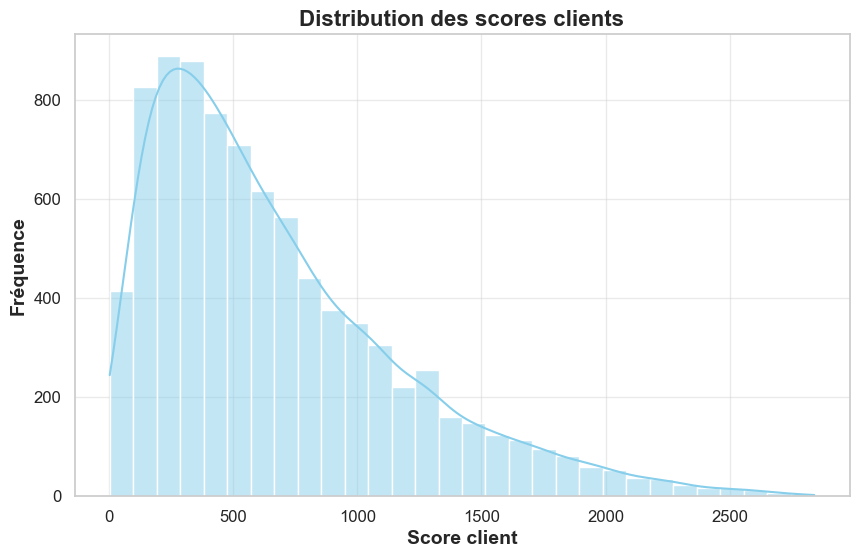

In [112]:
# Distribution des scores
sns.histplot(data_scores['score_client'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des scores clients')
plt.xlabel('Score client')
plt.ylabel('Fréquence')
plt.show()


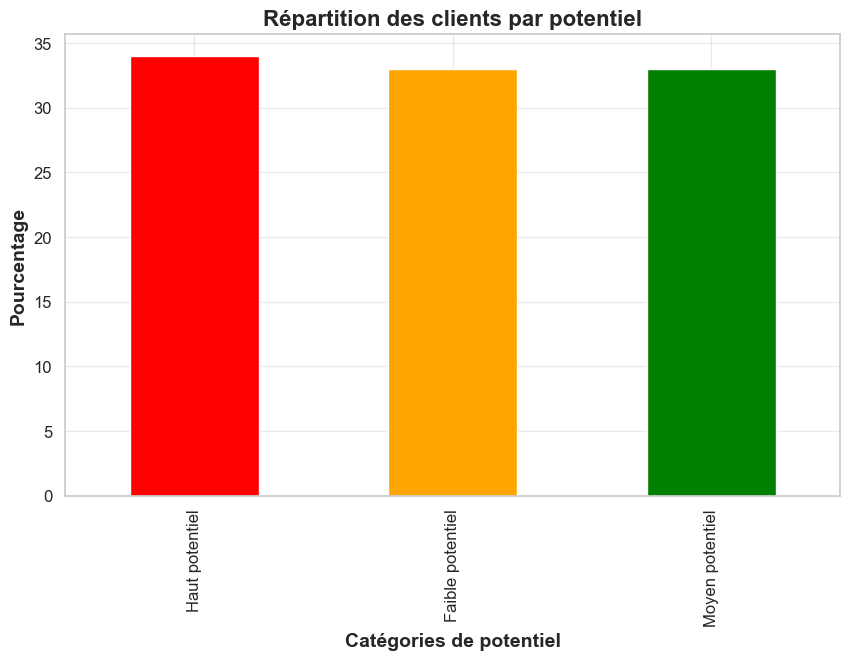

In [113]:
repartition_potentiel.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Répartition des clients par potentiel')
plt.xlabel('Catégories de potentiel')
plt.ylabel('Pourcentage')
plt.show()


## 7.5. Impact des remises sur les ventes

- But : Analyser comment les promotions influencent les ventes.  
- Résultat attendu : Mesurer l’efficacité des promotions par catégorie.